<a href="https://colab.research.google.com/github/Nikitaion/TensorFlowLearning/blob/main/11_tensorflow_exam_skills_checklist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Skills checklist


# Проработать всё тут, а потом запустить тот же код в PyCharm с настройками под экзамен
Этот раздел удалить

##(1) TensorFlow developer skills

*   Know how to program in Python, resolve Python issues, and compile and run Python programs in PyCharm. ✅
*   Know how to find information about TensorFlow APIs, including how to find guides and API ✅
*   Know how to find information about TensorFlow APIs, including how to find guides and API references on tensorflow.org. ✅
*  Know how to debug, investigate, and solve error messages from the TensorFlow API. ✅
*  Know how to search beyond tensorflow.org, as and when necessary, to solve your TensorFlow questions. ✅
*  Know how to create ML models using TensorFlow where the model size is reasonable for the problem being solved. ✅
*  Know how to save ML models and check the model file size.
*  Understand the compatibility discrepancies between different versions of TensorFlow.

## (2) Building and training neural network models using TensorFlow 2.x


* Use TensorFlow 2.x. ✅
* Build, compile and train machine learning (ML) models using TensorFlow.
* Preprocess data to get it ready for use in a model.
* Use models to predict results.
* Build and train models for binary classification.
* Build and train models for multi-class categorization.
* Plot loss and accuracy of a trained model.
* Identify strategies to prevent overfitting, including augmentation and dropout.
* Use pretrained models (transfer learning).
* Extract features from pre-trained models.
* Ensure that inputs to a model are in the correct shape.
* Ensure that you can match test data to the input shape of a neural network
* Ensure you can match output data of a neural network to specified input shape for test data
* Understand batch loading of data.
* Use callbacks to trigger the end of training cycles.
* Use datasets from different sources.
* Use datasets in different formats, including json and csv
* Use datasets from tf.data.datasets.

## Typical architecture of a classification neural network 

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

In [ ]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

Tensorflow version: 2.8.0


# Binary classification.


In [ ]:

data = pd.read_csv("https://raw.githubusercontent.com/Nikitaion/TensorFlowLearning/main/tf_exam_preparation/data_banknote_authentication.txt", sep=",", header=None)
data

# 1. variance of Wavelet Transformed image (continuous)
# 2. skewness of Wavelet Transformed image (continuous)
# 3. curtosis of Wavelet Transformed image (continuous)
# 4. entropy of image (continuous)
# 5. class (integer)

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
# Preprocess data to get it ready for use in a model.
data = data.rename(columns={0: "Variance", 1: "Skewness", 2: "Kurtosis", 3: "Entropy", 4: "Class"})
data

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
data.shape, len(data), data.ndim, data.size #data.dtype

((1372, 5), 1372, 2, 6860)

In [ ]:
# Shuffle data
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
# describe data
data[["Variance", "Skewness", "Kurtosis", "Entropy"]].describe()

,Variance,Skewness,Kurtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [ ]:
# count number of genuine and forged banknotes
data[["Class"]].value_counts()

Class
0        762
1        610
dtype: int64

In [ ]:
# train test split
X = data[["Variance", "Skewness", "Kurtosis", "Entropy"]]
y = data[["Class"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Variance,Skewness,Kurtosis,Entropy
529,2.15260,-6.16650,8.0831,-0.34355
243,3.43590,0.66216,2.1041,1.89220
1309,-2.19790,-2.12520,1.7151,0.45171
664,0.11592,3.22190,-3.4302,-2.84570
745,2.87700,-4.05990,3.6259,-0.32544
...,...,...,...,...
1095,-1.05550,0.79459,-1.6968,-0.46768
1130,3.47760,8.81100,-3.1886,-0.92285
1294,1.15580,6.40030,1.5506,0.69610
860,4.04050,0.51524,1.0279,1.10600


In [ ]:
X_test

,Variance,Skewness,Kurtosis,Entropy
430,-2.59610,-9.34900,9.794200,-0.28018
588,-5.16610,8.04330,0.044265,-4.49830
296,1.13150,7.92120,1.093000,-2.84440
184,4.06800,-2.93630,2.199200,0.50084
244,2.72960,2.87010,0.511240,0.50990
...,...,...,...,...
1341,-6.42470,9.53110,0.022844,-6.85170
1100,-0.69879,-3.37710,4.121100,1.50430
620,-0.21394,-0.68287,0.096532,1.19650
617,0.26637,0.73252,-0.678910,0.03533


In [ ]:
y_train.value_counts()

Class
0        608
1        489
dtype: int64

In [ ]:
y_test.value_counts()

Class
0        154
1        121
dtype: int64

In [ ]:
# Build and train models for binary classification.

# Build model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation='relu'),
  # tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  # tf.keras.layers.Dense(1)
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile 
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=["accuracy"])

# fit model
history_1 = model_1.fit(X_train,
            y_train,
            epochs=50,
            verbose=0) # set verbose=0 to make the output print less

In [ ]:
# Evaluate the model
model_1.evaluate(X_test,  y_test, verbose=2)

9/9 - 0s - loss: 8.3492e-04 - accuracy: 1.0000 - 126ms/epoch - 14ms/step


[0.0008349178824573755, 1.0]

In [ ]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 20)                100       
                                                                 
 dense_22 (Dense)            (None, 20)                420       
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history_1.history)

,loss,accuracy
0,0.560574,0.658159
1,0.350313,0.884230
2,0.238930,0.949863
3,0.163757,0.973564
4,0.115776,0.985415
5,0.082034,0.996354
6,0.058801,0.996354
7,0.043057,0.999088
8,0.032528,1.000000
9,0.024940,1.000000


Text(0.5, 1.0, 'Model_1 training curves')

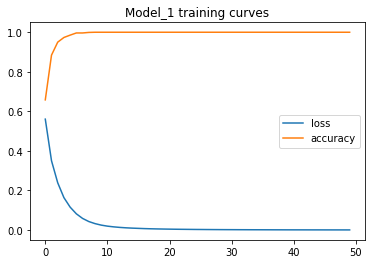

In [ ]:
# Plot the loss curves
pd.DataFrame(history_1.history).plot()
plt.title("Model_1 training curves")

Also we can find best learning rate and plot confusion matrix. See: https://github.com/Nikitaion/TensorFlowLearning/blob/main/02_neural_network_classification_with_tensorflow.ipynb

# Multiclass classification

In [ ]:
fifa_19_ds = pd.read_csv("https://raw.githubusercontent.com/Nikitaion/TensorFlowLearning/main/tf_exam_preparation/fifa_19.csv")
fifa_19_ds.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
fifa_19_ds = fifa_19_ds.drop(axis=1, labels=["Name", "Unnamed: 0", "ID", "Photo", "Flag", "Overall", "Potential", "Club", "Club Logo", "Value", "Wage", "International Reputation", "Work Rate", "Body Type", "Real Face", "Jersey Number", "Joined", "Loaned From", "Contract Valid Until", "Release Clause"])
fifa_19_ds.head()

,Age,Nationality,Special,Preferred Foot,Weak Foot,Skill Moves,Position,Height,Weight,LS,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,2202,Left,4.0,4.0,RF,5'7,159lbs,88+2,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,2228,Right,4.0,5.0,ST,6'2,183lbs,91+3,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,2143,Right,5.0,5.0,LW,5'9,150lbs,84+3,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,1471,Right,3.0,1.0,GK,6'4,168lbs,NaN,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,2281,Right,5.0,4.0,RCM,5'11,154lbs,82+3,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
fifa_19_ds.columns

Index(['Age', 'Nationality', 'Special', 'Preferred Foot', 'Weak Foot',
       'Skill Moves', 'Position', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [ ]:
fifa_19_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 69 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              18207 non-null  int64  
 1   Nationality      18207 non-null  object 
 2   Special          18207 non-null  int64  
 3   Preferred Foot   18159 non-null  object 
 4   Weak Foot        18159 non-null  float64
 5   Skill Moves      18159 non-null  float64
 6   Position         18147 non-null  object 
 7   Height           18159 non-null  object 
 8   Weight           18159 non-null  object 
 9   LS               16122 non-null  object 
 10  ST               16122 non-null  object 
 11  RS               16122 non-null  object 
 12  LW               16122 non-null  object 
 13  LF               16122 non-null  object 
 14  CF               16122 non-null  object 
 15  RF               16122 non-null  object 
 16  RW               16122 non-null  object 
 17  LAM         

In [ ]:
fifa_19_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Crossing,18159.0,49.734181,18.364524,5.0,38.0,54.0,64.0,93.0
Finishing,18159.0,45.550911,19.525820,2.0,30.0,49.0,62.0,95.0
HeadingAccuracy,18159.0,52.298144,17.379909,4.0,44.0,56.0,64.0,94.0
ShortPassing,18159.0,58.686712,14.699495,7.0,54.0,62.0,68.0,93.0
Volleys,18159.0,42.909026,17.694408,4.0,30.0,44.0,57.0,90.0
Dribbling,18159.0,55.371001,18.910371,4.0,49.0,61.0,68.0,97.0


In [ ]:
fifa_19_ds.isnull().sum()


Age                0
Nationality        0
Special            0
Preferred Foot    48
Weak Foot         48
                  ..
GKDiving          48
GKHandling        48
GKKicking         48
GKPositioning     48
GKReflexes        48
Length: 69, dtype: int64

In [ ]:
missing_height = fifa_19_ds[fifa_19_ds['Height'].isnull()].index.tolist()
missing_height

[13236,
 13237,
 13238,
 13239,
 13240,
 13241,
 13242,
 13243,
 13244,
 13245,
 13246,
 13247,
 13248,
 13249,
 13250,
 13251,
 13252,
 13253,
 13254,
 13255,
 13256,
 13257,
 13258,
 13259,
 13260,
 13261,
 13262,
 13263,
 13264,
 13265,
 13266,
 13267,
 13268,
 13269,
 13270,
 13271,
 13272,
 13273,
 13274,
 13275,
 13276,
 13277,
 13278,
 13279,
 13280,
 13281,
 13282,
 13283]

In [ ]:
len(fifa_19_ds[fifa_19_ds['Height'].isnull()])

48

In [ ]:
# Delete all rows where Height == null
fifa_19_ds = fifa_19_ds.dropna(subset=['Height'])

In [ ]:
# How much null now?
fifa_19_ds.isnull().sum().head(15)

Age                  0
Nationality          0
Special              0
Preferred Foot       0
Weak Foot            0
Skill Moves          0
Position            12
Height               0
Weight               0
LS                2037
ST                2037
RS                2037
LW                2037
LF                2037
CF                2037
dtype: int64

In [ ]:
fifa_19_ds = fifa_19_ds.dropna(subset=['LS'])

In [ ]:
fifa_19_ds.isnull().sum().head(40)
# No null values now

Age                0
Nationality        0
Special            0
Preferred Foot     0
Weak Foot          0
Skill Moves        0
Position           0
Height             0
Weight             0
LS                 0
ST                 0
RS                 0
LW                 0
LF                 0
CF                 0
RF                 0
RW                 0
LAM                0
CAM                0
RAM                0
LM                 0
LCM                0
CM                 0
RCM                0
RM                 0
LWB                0
LDM                0
CDM                0
RDM                0
RWB                0
LB                 0
LCB                0
CB                 0
RCB                0
RB                 0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
dtype: int64

In [ ]:
fifa_19_ds.isnull().sum().tail(30)
# No null values now

Volleys           0
Dribbling         0
Curve             0
FKAccuracy        0
LongPassing       0
BallControl       0
Acceleration      0
SprintSpeed       0
Agility           0
Reactions         0
Balance           0
ShotPower         0
Jumping           0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
Composure         0
Marking           0
StandingTackle    0
SlidingTackle     0
GKDiving          0
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
dtype: int64

In [ ]:
x = "88+2"
x

'88+2'

In [ ]:
# pd.to_numeric(fifa_19_ds["LS"])

In [ ]:
# fifa_19_ds["LS"].astype(int)

In [ ]:
fifa_19_ds.head()

,Age,Nationality,Special,Preferred Foot,Weak Foot,Skill Moves,Position,Height,Weight,LS,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,2202,Left,4.0,4.0,RF,5'7,159lbs,88+2,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,2228,Right,4.0,5.0,ST,6'2,183lbs,91+3,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,2143,Right,5.0,5.0,LW,5'9,150lbs,84+3,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,27,Belgium,2281,Right,5.0,4.0,RCM,5'11,154lbs,82+3,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,Belgium,2142,Right,4.0,4.0,LF,5'8,163lbs,83+3,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


In [ ]:
print('Total number of countries : {0}'.format(fifa_19_ds['Nationality'].nunique()))


Total number of countries : 163


In [ ]:
fifa_19_ds['Nationality'].value_counts()

England                 1483
Germany                 1031
Spain                    955
Argentina                839
France                   810
                        ... 
Liberia                    1
Mauritius                  1
United Arab Emirates       1
Kuwait                     1
Botswana                   1
Name: Nationality, Length: 163, dtype: int64

In [ ]:
def feets_to_centimeters(df_value):
  feets_and_inches = df_value.split("'")
  feets = int(feets_and_inches[0])
  inches = int(feets_and_inches[1])
  centimeters = round((feets * 12 + inches) * 2.54)

  return centimeters

In [ ]:
# For changing height
fifa_19_ds['Height'].apply(feets_to_centimeters)

0        170
1        188
2        175
4        180
5        173
        ... 
18202    175
18203    190
18204    173
18205    178
18206    178
Name: Height, Length: 16122, dtype: int64

In [ ]:
# For changing weight
fifa_19_ds['Weight'].apply(lambda x: int(x[:-3]))

0        159
1        183
2        150
4        154
5        163
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 16122, dtype: int64

In [ ]:
# For LS - RB
fifa_19_ds['LS'].apply(lambda x: int(x[:2]) + int(x[-1:]))

0        90
1        94
2        87
4        85
5        86
         ..
18202    44
18203    47
18204    47
18205    49
18206    45
Name: LS, Length: 16122, dtype: int64

In [ ]:
# To numbers: Nationality, Preferred Foot(0/1), Position(y), Weight(remove lbs), height(from ft'inches to meters or sentimeters), LS-RB - sum
# LS-RB если не будет другого варианта - разложить на множители (число слева от плюса в int и число справа от плюса в int)  и сложить их

# Национальность, нога и позиция попробовать сперва без numeric, а потом улучшить и перевести в цифры 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html https://stackoverflow.com/questions/47595268/convert-classes-to-numeric-in-a-pandas-dataframe

# Возможно правильно будет сделать TextVectorization layer

In [ ]:
fifa_19_ds.head()

,Age,Nationality,Special,Preferred Foot,Weak Foot,Skill Moves,Position,Height,Weight,LS,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,2202,Left,4.0,4.0,RF,5'7,159lbs,88+2,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,2228,Right,4.0,5.0,ST,6'2,183lbs,91+3,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,2143,Right,5.0,5.0,LW,5'9,150lbs,84+3,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,27,Belgium,2281,Right,5.0,4.0,RCM,5'11,154lbs,82+3,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,Belgium,2142,Right,4.0,4.0,LF,5'8,163lbs,83+3,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


In [ ]:
# Weight
fifa_19_ds['Weight'] = fifa_19_ds['Weight'].apply(lambda x: int(x[:-3]))
# Height
fifa_19_ds['Height'] = fifa_19_ds['Height'].apply(feets_to_centimeters)
# LS - RB
fifa_19_ds['Height']

0        170
1        188
2        175
4        180
5        173
        ... 
18202    175
18203    190
18204    173
18205    178
18206    178
Name: Height, Length: 16122, dtype: int64

In [ ]:
# fifa_19_ds[["LS", "ST"]].apply(lambda x: int(x[:2]) + int(x[-1:]))

In [ ]:
test_df = pd.DataFrame({
    'col0': [2222, 3333, 4444, 5555, 6666],
    'colA': [1111, 2222, 3333, 4444, 5555],
    'colB': [True, False, None, False, True],
    'colC': ['a', 'b', 'c', 'd', 'e'],
    'colD': [1.0, 2.0, 3.0, 4.0, 5.0]
})
test_df

,col0,colA,colB,colC,colD
0,2222,1111,True,a,1.0
1,3333,2222,False,b,2.0
2,4444,3333,None,c,3.0
3,5555,4444,False,d,4.0
4,6666,5555,True,e,5.0


In [ ]:
# test_df[["col0", "colA"]].apply(lambda x: int(x[:2]) + int(x[-1:]))

In [ ]:
# test_df[["col0", "colA"]].apply(lambda x: x+1)

In [ ]:
test_df = pd.DataFrame({
    'col0': ['22x2', '33x3', '44x4', '55x5', '66x6'],
    'colA': ['11x1', '22x2', '33x3', '44x4', '55x5'],
    'colB': [True, False, None, False, True],
    'colC': ['a', 'b', 'c', 'd', 'e'],
    'colD': [1.0, 2.0, 3.0, 4.0, 5.0]
})
test_df

,col0,colA,colB,colC,colD
0,22x2,11x1,True,a,1.0
1,33x3,22x2,False,b,2.0
2,44x4,33x3,None,c,3.0
3,55x5,44x4,False,d,4.0
4,66x6,55x5,True,e,5.0


In [ ]:
test_df[["col0", "colA"]].apply(lambda x: x.replace("x", ""))

,col0,colA
0,22x2,11x1
1,33x3,22x2
2,44x4,33x3
3,55x5,44x4
4,66x6,55x5


In [ ]:
df = test_df[["col0", "colA"]]
df

,col0,colA
0,22x2,11x1
1,33x3,22x2
2,44x4,33x3
3,55x5,44x4
4,66x6,55x5


In [ ]:
df.apply(lambda x: x.replace("x", ""))

,col0,colA
0,22x2,11x1
1,33x3,22x2
2,44x4,33x3
3,55x5,44x4
4,66x6,55x5


In [ ]:
df

,col0,colA
0,22x2,11x1
1,33x3,22x2
2,44x4,33x3
3,55x5,44x4
4,66x6,55x5


In [ ]:
# test_df["col0"].apply(lambda x: x.replace("x", ""), axis=1, result_type='expand')

In [ ]:
fifa_19_ds[["LS", "ST"]]

,LS,ST
0,88+2,88+2
1,91+3,91+3
2,84+3,84+3
4,82+3,82+3
5,83+3,83+3
...,...,...
18202,42+2,42+2
18203,45+2,45+2
18204,45+2,45+2
18205,47+2,47+2


In [ ]:
# y - Position
# Positions - goalkeeper/forward_player/midfielder_player/defender_player

goalkeeper = ["GK"]
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]


In [ ]:
def change_positions(letters):
  if letters in midfielder_player:
    return 0
  elif letters in forward_player:
    return 1
  elif letters in defender_player:
    return 3

  return 4

In [ ]:
# print(change_positions("GK"))

In [ ]:
fifa_19_ds.loc[fifa_19_ds["Position"] == "GK", "Position"] = 0

fifa_19_ds.loc[fifa_19_ds["Position"].isin(defender_player), "Position"] = 1

fifa_19_ds.loc[fifa_19_ds["Position"].isin(midfielder_player), "Position"] = 2

fifa_19_ds.loc[fifa_19_ds["Position"].isin(forward_player), "Position"] = 3


In [ ]:
# fifa_19_ds["Position"].apply(change_positions)

In [ ]:
# fifa_19_ds["Position"] = fifa_19_ds["Position"].apply(change_positions)

In [ ]:
fifa_19_ds.head(9)

,Age,Nationality,Special,Preferred Foot,Weak Foot,Skill Moves,Position,Height,Weight,LS,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,2202,Left,4.0,4.0,3,170,159,88+2,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,2228,Right,4.0,5.0,3,188,183,91+3,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,2143,Right,5.0,5.0,3,175,150,84+3,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,27,Belgium,2281,Right,5.0,4.0,2,180,154,82+3,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,Belgium,2142,Right,4.0,4.0,3,173,163,83+3,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
6,32,Croatia,2280,Right,4.0,4.0,2,173,146,77+3,...,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0
7,31,Uruguay,2346,Right,4.0,3.0,3,183,190,87+5,...,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0
8,32,Spain,2201,Right,3.0,3.0,1,183,181,73+3,...,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0
10,29,Poland,2152,Right,4.0,4.0,3,183,176,87+3,...,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0


In [ ]:
X

,Age,Nationality,Special,Preferred Foot,Weak Foot,Skill Moves,Height,Weight,LS,ST,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,2202,Left,4.0,4.0,170,159,88+2,88+2,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,2228,Right,4.0,5.0,188,183,91+3,91+3,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,2143,Right,5.0,5.0,175,150,84+3,84+3,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,27,Belgium,2281,Right,5.0,4.0,180,154,82+3,82+3,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,Belgium,2142,Right,4.0,4.0,173,163,83+3,83+3,...,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,England,1307,Right,2.0,2.0,175,134,42+2,42+2,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,19,Sweden,1098,Right,2.0,2.0,190,170,45+2,45+2,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,16,England,1189,Right,3.0,2.0,173,148,45+2,45+2,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,17,England,1228,Right,3.0,2.0,178,154,47+2,47+2,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [ ]:
X.values

array([[31, 'Argentina', 2202, ..., 15.0, 14.0, 8.0],
       [33, 'Portugal', 2228, ..., 15.0, 14.0, 11.0],
       [26, 'Brazil', 2143, ..., 15.0, 15.0, 11.0],
       ...,
       [16, 'England', 1189, ..., 10.0, 6.0, 13.0],
       [17, 'England', 1228, ..., 14.0, 8.0, 9.0],
       [16, 'England', 1321, ..., 9.0, 12.0, 9.0]], dtype=object)

In [ ]:
# создать test and train
X = fifa_19_ds.drop(["Position"], axis=1)
y = fifa_19_ds["Position"]
y_cat = tf.keras.utils.to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split( X, y_cat, test_size=0.2, random_state=42)
X_train

,Age,Nationality,Special,Preferred Foot,Weak Foot,Skill Moves,Height,Weight,LS,ST,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
13695,23,Jamaica,1663,Left,3.0,3.0,175,143,59+2,59+2,...,46.0,53.0,44.0,44.0,43.0,7.0,12.0,15.0,7.0,9.0
10833,26,Guatemala,1716,Left,3.0,2.0,183,154,57+2,57+2,...,55.0,55.0,63.0,66.0,63.0,13.0,9.0,11.0,9.0,7.0
15388,21,Republic of Ireland,1523,Left,3.0,2.0,185,161,49+2,49+2,...,52.0,44.0,55.0,54.0,57.0,14.0,6.0,13.0,11.0,10.0
15403,22,Korea Republic,1582,Right,3.0,2.0,175,154,54+2,54+2,...,42.0,51.0,51.0,39.0,47.0,8.0,12.0,11.0,9.0,12.0
2657,32,Ukraine,1814,Right,3.0,3.0,188,192,72+2,72+2,...,80.0,72.0,51.0,41.0,39.0,9.0,9.0,7.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14916,21,South Africa,1482,Left,3.0,2.0,165,137,45+2,45+2,...,42.0,55.0,64.0,61.0,57.0,9.0,14.0,7.0,8.0,11.0
5924,23,Spain,1755,Right,2.0,3.0,173,150,56+2,56+2,...,44.0,65.0,65.0,66.0,65.0,9.0,10.0,6.0,7.0,13.0
967,23,Argentina,2073,Right,3.0,4.0,188,185,75+2,75+2,...,70.0,74.0,63.0,52.0,48.0,11.0,8.0,15.0,12.0,7.0
17794,19,Chile,1490,Right,2.0,3.0,173,159,52+2,52+2,...,62.0,57.0,69.0,41.0,35.0,7.0,5.0,6.0,7.0,6.0


In [ ]:
y_train

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12897, 68), (3225, 68), (12897, 4), (3225, 4))

## Typical architecture of a classification neural network 

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

In [ ]:
type(X_train), X_train.shape

(pandas.core.frame.DataFrame, (12897, 68))

In [ ]:
type(y_train), y_train.shape

(numpy.ndarray, (12897, 4))

In [ ]:
y_cat

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
# np.asarray(y_train).astype(np.float32)

In [ ]:
# X_train=np.asarray(X_train).astype(np.int)

# y_train=np.asarray(y_train).astype(np.int)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x = pd.DataFrame(sc.fit_transform(X_train))
# x

ValueError: ignored

In [ ]:
# build, compile, fit
# Build and train models for binary classification.

# Build model
model_categorical_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation='relu'),
  # tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

# compile 
model_categorical_1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=["accuracy"])

# fit model
model_categorical_1 = model_1.fit(epochs=50,
                                  x=X_train,
                                  y=y_train)

ValueError: ignored

In [ ]:
X_train, X_train.shape, type(X_train)

(       Age          Nationality  Special Preferred Foot  Weak Foot  \
 13695   23              Jamaica     1663           Left        3.0   
 10833   26            Guatemala     1716           Left        3.0   
 15388   21  Republic of Ireland     1523           Left        3.0   
 15403   22       Korea Republic     1582          Right        3.0   
 2657    32              Ukraine     1814          Right        3.0   
 ...    ...                  ...      ...            ...        ...   
 14916   21         South Africa     1482           Left        3.0   
 5924    23                Spain     1755          Right        2.0   
 967     23            Argentina     2073          Right        3.0   
 17794   19                Chile     1490          Right        2.0   
 8026    28             China PR     1848           Left        2.0   
 
        Skill Moves  Height  Weight    LS    ST  ... Penalties Composure  \
 13695          3.0     175     143  59+2  59+2  ...      46.0      53

In [ ]:
y_train, y_train.shape, type(y_train)

(13695    0
 10833    3
 15388    3
 15403    0
 2657     1
         ..
 14916    3
 5924     3
 967      0
 17794    1
 8026     3
 Name: Position, Length: 12897, dtype: int64,
 (12897,),
 pandas.core.series.Series)

In [ ]:
tf.convert_to_tensor(y_train)

<tf.Tensor: shape=(12897,), dtype=int64, numpy=array([0, 3, 3, ..., 0, 1, 3])>

In [ ]:
tf.convert_to_tensor(y_train, dtype=tf.float32)

<tf.Tensor: shape=(12897,), dtype=float32, numpy=array([0., 3., 3., ..., 0., 1., 3.], dtype=float32)>

In [ ]:
# Remove Missing Values 
na = pd.notnull(fifa_19_ds["Position"])
fifa_19_ds = fifa_19_ds[na]

In [ ]:
fifa_19_ds = fifa_19_ds[["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]


In [ ]:
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]
fifa_19_ds.loc[fifa_19_ds["Position"] == "GK", "Position"] = 0

fifa_19_ds.loc[fifa_19_ds["Position"].isin(defender_player), "Position"] = 1

fifa_19_ds.loc[fifa_19_ds["Position"].isin(midfielder_player), "Position"] = 2

fifa_19_ds.loc[fifa_19_ds["Position"].isin(forward_player), "Position"] = 3


In [ ]:
x = fifa_19_ds.drop("Position", axis = 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
y = fifa_19_ds["Position"]


In [ ]:
y_cat = tf.keras.utils.to_categorical(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y_cat, test_size=0.2)


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(60, input_shape = (33,), activation = "relu"))
model.add(tf.keras.layers.Dense(15, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4, activation = "softmax"))
model.compile(tf.keras.optimizers.Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 60)                2040      
                                                                 
 dense_45 (Dense)            (None, 15)                915       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_46 (Dense)            (None, 4)                 64        
                                                                 
Total params: 3,019
Trainable params: 3,019
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(x_train, y_train, verbose=1, epochs=100)


Epoch 1/100
404/404 [==============================] - 1s 3ms/step - loss: 0.3385 - accuracy: 0.8609
Epoch 2/100
404/404 [==============================] - 1s 3ms/step - loss: 0.3341 - accuracy: 0.8618
Epoch 3/100
404/404 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8587
Epoch 4/100
404/404 [==============================] - 1s 2ms/step - loss: 0.3291 - accuracy: 0.8635
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8609
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 0.3289 - accuracy: 0.8619
Epoch 7/100
404/404 [==============================] - 1s 2ms/step - loss: 0.3242 - accuracy: 0.8632
Epoch 8/100
404/404 [==============================] - 1s 2ms/step - loss: 0.3185 - accuracy: 0.8680
Epoch 9/100
404/404 [==============================] - 1s 2ms/step - loss: 0.3171 - accuracy: 0.8680
Epoch 10/100
404/404 [==============================] - 1s 2ms/step - loss: 0.3165 - accura

In [ ]:
# проверить результаты. если нужно - дорабоать модель

In [ ]:
# если нужно перевести все значения 0-1, float32

In [ ]:
# build, compile, fit...

In [ ]:
# visualize

In [ ]:
# Загрузить эксель


# Почистить/заполнить missed values

# От 0 до 1

In [ ]:
# Know how to save ML models and check the model file size.
# Use models to predict results.
# Build and train models for multi-class categorization.
# Plot loss and accuracy of a trained model.
# Identify strategies to prevent overfitting, including augmentation and dropout.
# Use pretrained models (transfer learning).
# Extract features from pre-trained models.
# Ensure that inputs to a model are in the correct shape.
# Ensure that you can match test data to the input shape of a neural network
# Ensure you can match output data of a neural network to specified input shape for test data
# Understand batch loading of data.
# Use callbacks to trigger the end of training cycles.

# Use datasets from different sources.
# Use datasets in different formats, including json and csv
# Use datasets from tf.data.datasets.

# (3) Image classification


*   Define Convolutional neural networks with Conv2D and pooling layers. ✅
*   Build and train models to process real-world image datasets. ✅
*   Understand how to use convolutions to improve your neural network ✅
*   Use real-world images in different shapes and sizes ✅
https://wandb.ai/ayush-thakur/dl-question-bank/reports/How-to-Handle-Images-of-Different-Sizes-in-a-Convolutional-Neural-Network--VmlldzoyMDk3NzQ
*   Use image augmentation to prevent overfitting. ✅
*   Use ImageDataGenerator. ✅
*   Understand how ImageDataGenerator labels images based on the directory structure. ✅


## A (typical) architecture of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp "/content/gdrive/MyDrive/neural_networks/intel_image_classification.zip" "/content/intel_image_classification.zip"

In [ ]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("intel_image_classification.zip", "r")
zip_ref.extractall("/content/intel_image_classification")
zip_ref.close()

In [ ]:
!ls intel_image_classification

ls: cannot access 'intel_image_classification': No such file or directory


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("intel_image_classification"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'intel_image_classification'.
There are 1 directories and 0 images in 'intel_image_classification/seg_test'.
There are 6 directories and 0 images in 'intel_image_classification/seg_test/seg_test'.
There are 0 directories and 510 images in 'intel_image_classification/seg_test/seg_test/sea'.
There are 0 directories and 501 images in 'intel_image_classification/seg_test/seg_test/street'.
There are 0 directories and 437 images in 'intel_image_classification/seg_test/seg_test/buildings'.
There are 0 directories and 525 images in 'intel_image_classification/seg_test/seg_test/mountain'.
There are 0 directories and 553 images in 'intel_image_classification/seg_test/seg_test/glacier'.
There are 0 directories and 474 images in 'intel_image_classification/seg_test/seg_test/forest'.
There are 1 directories and 0 images in 'intel_image_classification/seg_pred'.
There are 0 directories and 7301 images in 'intel_image_classification/seg_pred/seg_pred'.
There ar

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("intel_image_classification/seg_train/seg_train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (150, 150, 3)


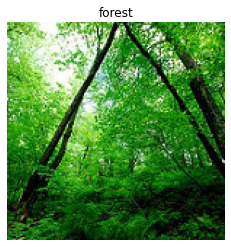

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="intel_image_classification/seg_train/seg_train/",
                        target_class="forest")


In [ ]:
# View the img (actually just a big array/tensor)
img

array([[[100, 210,  59],
        [ 73, 149,  27],
        [172, 227, 125],
        ...,
        [  1, 101,   0],
        [ 16,  94,   0],
        [  0,  45,   0]],

       [[ 77, 150,  60],
        [ 76, 140,  30],
        [114, 178,  42],
        ...,
        [ 78, 178,  56],
        [ 51, 124,  19],
        [127, 176,  95]],

       [[192, 237, 198],
        [122, 179,  82],
        [149, 219,  68],
        ...,
        [ 18, 108,   0],
        [ 51, 127,  18],
        [ 14,  76,   0]],

       ...,

       [[ 10, 119,  12],
        [  8, 105,   8],
        [  0,  68,   0],
        ...,
        [  5,  63,   2],
        [  3,  64,   4],
        [  9,  69,   9]],

       [[ 23, 132,  25],
        [ 35, 133,  32],
        [ 17,  98,   6],
        ...,
        [  0,  35,   0],
        [  3,  55,   6],
        [ 13,  71,  13]],

       [[  0,  81,   0],
        [ 32, 123,  20],
        [ 35, 116,  21],
        ...,
        [  0,  17,   0],
        [  2,  44,   6],
        [  6,  59,   7]]

In [ ]:
# View the image shape
img.shape # returns (width, height, colour channels)

(150, 150, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.39215686, 0.82352941, 0.23137255],
        [0.28627451, 0.58431373, 0.10588235],
        [0.6745098 , 0.89019608, 0.49019608],
        ...,
        [0.00392157, 0.39607843, 0.        ],
        [0.0627451 , 0.36862745, 0.        ],
        [0.        , 0.17647059, 0.        ]],

       [[0.30196078, 0.58823529, 0.23529412],
        [0.29803922, 0.54901961, 0.11764706],
        [0.44705882, 0.69803922, 0.16470588],
        ...,
        [0.30588235, 0.69803922, 0.21960784],
        [0.2       , 0.48627451, 0.0745098 ],
        [0.49803922, 0.69019608, 0.37254902]],

       [[0.75294118, 0.92941176, 0.77647059],
        [0.47843137, 0.70196078, 0.32156863],
        [0.58431373, 0.85882353, 0.26666667],
        ...,
        [0.07058824, 0.42352941, 0.        ],
        [0.2       , 0.49803922, 0.07058824],
        [0.05490196, 0.29803922, 0.        ]],

       ...,

       [[0.03921569, 0.46666667, 0.04705882],
        [0.03137255, 0.41176471, 0.03137255],
        [0.        , 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "image_classification/seg_train/seg_train"
test_dir = "image_classification/seg_test/seg_test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(150, 150), # images have size 150x150. or we can convert to target value
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

test_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(150, 150),
                                               class_mode="categorical",
                                               seed=42)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.



Some things to here:
* Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
* The `target_size` parameter defines the input size of our images in `(height, width)` format.
* The `class_mode` value of `'categorical'` defines our classification problem type. If we had only two classes, we would use `'binary'`.
* The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

We can take a look at our batched images and labels by inspecting the `train_data` object.

In [ ]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# View the first batch of labels
labels

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_2 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(150, 150, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(6, activation='softmax') # output layer (specify output shape)
])
# model_1 = tf.keras.models.Sequential([
#   Conv2D(filters=10, 
#          kernel_size=3, # can also be (3, 3)
#          activation="relu", 
#          input_shape=(150, 150, 3)), # first layer specifies input shape (height, width, colour channels)
#   Conv2D(10, 3, activation="relu"),
#   MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
#                             padding="valid"), # padding can also be 'same'
#   Conv2D(10, 3, activation="relu"),
#   Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
#   MaxPool2D(2),
#   Flatten(),
#   Dense(6, activation="softmax") # binary activation output
# ])


The typical CNN structure of:

```
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
```

Let's discuss some of the components of the `Conv2D` layer:

* The "`2D`" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* `filters` - these are the number of "feature extractors" that will be moving over our images.
* `kernel_size` - the size of our filters, for example, a `kernel_size` of `(3, 3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. **The smaller the kernel, the more fine-grained features it will extract**.
* `stride` - the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filter moves across each pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time.
* `padding` - this can be either `'same'` or `'valid'`, `'same'` adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as `'valid'` (default) cuts off excess pixels where the `filter` doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

A **feature** can be considered any significant part of an image. For example a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these **features** are not defined by us, instead, the model learns them as it applies different filters across the image.

> 📖 **Resources:** For a great demonstration of these in action, be sure to spend some time going through the following:
  * [CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/) - a great visual overview of many of the concepts we're replicating here with code.
  * [A guide to convolutional arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf) - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
  * For a great explanation of padding, see this [Stack Overflow answer](https://stackoverflow.com/a/39371113/7900723).

In [ ]:
# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


Our model is compiled, time to fit it.

You'll notice two new parameters here:
* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (x images in batches of 32 = x/32 = ~439 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (y test images in batches of 32 = y/32 = ~94 steps)

In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(439, 94)

Time to fit model.

Two new parameters here:
* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [ ]:
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 458s 1s/step - loss: 0.9296 - accuracy: 0.6396 - val_loss: 0.8441 - val_accuracy: 0.6773
Epoch 2/5
439/439 [==============================] - 452s 1s/step - loss: 0.5518 - accuracy: 0.8081 - val_loss: 0.8663 - val_accuracy: 0.6923
Epoch 3/5
439/439 [==============================] - 455s 1s/step - loss: 0.2381 - accuracy: 0.9287 - val_loss: 1.1408 - val_accuracy: 0.6603
Epoch 4/5
439/439 [==============================] - 454s 1s/step - loss: 0.0990 - accuracy: 0.9771 - val_loss: 1.1189 - val_accuracy: 0.7187
Epoch 5/5
439/439 [==============================] - 454s 1s/step - loss: 0.0543 - accuracy: 0.9907 - val_loss: 1.2448 - val_accuracy: 0.7153


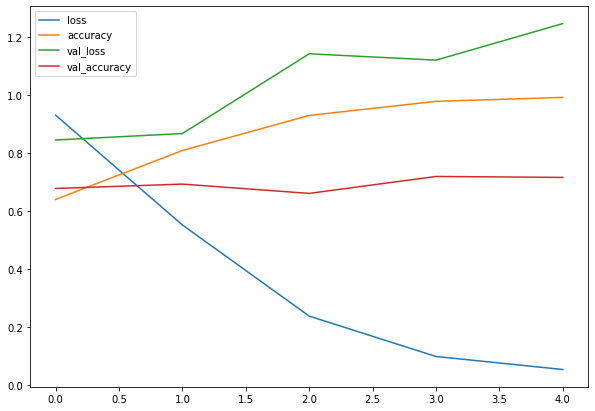

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

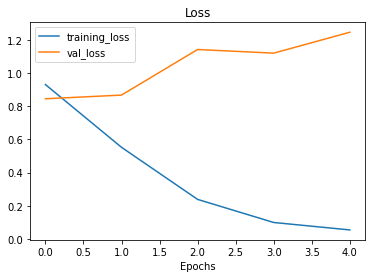

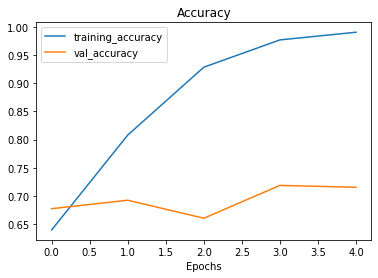

In [ ]:
# Check out the loss curves of model_2
plot_loss_curves(history_2)

In [ ]:
# Check out the model architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 146, 146, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 144, 144, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 207360)            0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1244166   
                                                                 
Total params: 1,246,266
Trainable params: 1,246,266
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(150, 150, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(6, activation='softmax')
])

In [ ]:
# Compile model (same as model_4)
model_3.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 212s 482ms/step - loss: 1.0385 - accuracy: 0.5956 - val_loss: 0.8702 - val_accuracy: 0.6577
Epoch 2/5
439/439 [==============================] - 199s 453ms/step - loss: 0.7471 - accuracy: 0.7263 - val_loss: 0.6896 - val_accuracy: 0.7443
Epoch 3/5
439/439 [==============================] - 209s 475ms/step - loss: 0.6919 - accuracy: 0.7515 - val_loss: 0.7580 - val_accuracy: 0.7177
Epoch 4/5
439/439 [==============================] - 195s 445ms/step - loss: 0.6199 - accuracy: 0.7780 - val_loss: 0.6528 - val_accuracy: 0.7657
Epoch 5/5
439/439 [==============================] - 189s 431ms/step - loss: 0.5714 - accuracy: 0.7957 - val_loss: 0.6013 - val_accuracy: 0.7817


In [ ]:
# Check out the model architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 10)       0         
 )                                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 10)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 10)      

Do you notice what's going on here with the output shape in each `MaxPooling2D` layer?

It gets halved each time. This is effectively the `MaxPooling2D` layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the `pool_size` parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in `model_3` and 477,431 in `model_2`).

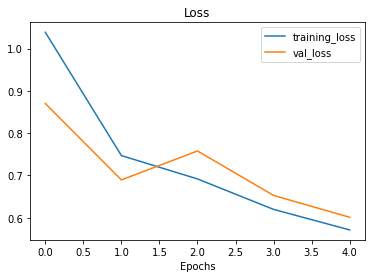

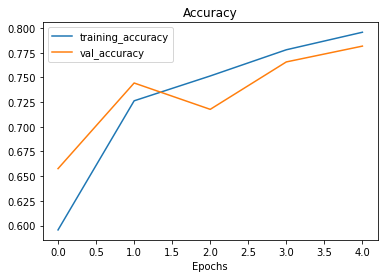

In [ ]:
# Plot loss curves of model_3 results
plot_loss_curves(history_3)

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) instances.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(150, 150),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=True) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(150, 150),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(150, 150),
                                             batch_size=32,
                                             class_mode='categorical')

Augmented training images:
Found 14034 images belonging to 6 classes.
Non-augmented training images:
Found 14034 images belonging to 6 classes.
Unchanged test images:
Found 3000 images belonging to 6 classes.


In [ ]:
# Create the model (same as model_5)
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(150, 150, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(6, activation='softmax')
])

# Compile the model
model_4.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
439/439 [==============================] - 265s 601ms/step - loss: 1.1576 - accuracy: 0.5475 - val_loss: 0.9978 - val_accuracy: 0.6363
Epoch 2/5
439/439 [==============================] - 261s 594ms/step - loss: 0.9556 - accuracy: 0.6305 - val_loss: 0.8496 - val_accuracy: 0.6913
Epoch 3/5
439/439 [==============================] - 276s 628ms/step - loss: 0.8937 - accuracy: 0.6614 - val_loss: 0.9093 - val_accuracy: 0.6780
Epoch 4/5
439/439 [==============================] - 280s 637ms/step - loss: 0.8629 - accuracy: 0.6764 - val_loss: 0.7318 - val_accuracy: 0.7300
Epoch 5/5
439/439 [==============================] - 257s 585ms/step - loss: 0.8255 - accuracy: 0.6955 - val_loss: 0.6958 - val_accuracy: 0.7477


A few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

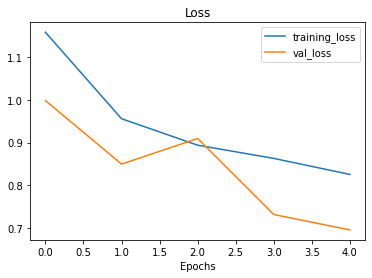

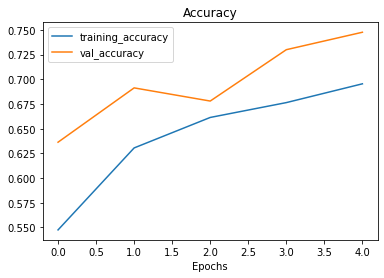

In [ ]:
plot_loss_curves(history_4)

### Making a prediction with our trained model


In [ ]:
# Classes we're working with
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [ ]:
model_4.evaluate(test_data)

94/94 [==============================] - 25s 258ms/step - loss: 0.6958 - accuracy: 0.7477


[0.6957682371139526, 0.7476666569709778]

In [ ]:
# And for random images from seg_pred pack

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=150):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
test_img = load_and_prep_image("/content/image_classification/seg_pred/seg_pred/88.jpg")
test_img

<tf.Tensor: shape=(150, 150, 3), dtype=float32, numpy=
array([[[0.28627452, 0.3137255 , 0.18039216],
        [0.15686275, 0.1882353 , 0.09803922],
        [0.29803923, 0.33333334, 0.3529412 ],
        ...,
        [0.23921569, 0.3137255 , 0.1882353 ],
        [0.13333334, 0.20784314, 0.08235294],
        [0.10980392, 0.1882353 , 0.05098039]],

       [[0.34901962, 0.38431373, 0.30980393],
        [0.10980392, 0.14901961, 0.10588235],
        [0.57254905, 0.60784316, 0.627451  ],
        ...,
        [0.30980393, 0.3764706 , 0.2509804 ],
        [0.19607843, 0.2627451 , 0.13725491],
        [0.20784314, 0.27450982, 0.14117648]],

       [[0.07843138, 0.11764706, 0.15686275],
        [0.24313726, 0.28235295, 0.31764707],
        [0.3372549 , 0.39215687, 0.40392157],
        ...,
        [0.31764707, 0.3764706 , 0.25490198],
        [0.23529412, 0.29411766, 0.17254902],
        [0.28235295, 0.34117648, 0.21960784]],

       ...,

       [[0.24705882, 0.3647059 , 0.12941177],
        [0.21

In [ ]:
# Make a prediction on our custom image (spoiler: this won't work)
# model_4.predict(test_img)

ValueError: ignored

There's one more problem...

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of `(batch_size, 224, 224, 3)`.

We can fix this by adding an extra to our custom image tensor using [`tf.expand_dims`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).

In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {test_img.shape}")
test_img = tf.expand_dims(test_img, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {test_img.shape}")
test_img

Shape before new dimension: (150, 150, 3)
Shape after new dimension: (1, 150, 150, 3)


<tf.Tensor: shape=(1, 150, 150, 3), dtype=float32, numpy=
array([[[[0.28627452, 0.3137255 , 0.18039216],
         [0.15686275, 0.1882353 , 0.09803922],
         [0.29803923, 0.33333334, 0.3529412 ],
         ...,
         [0.23921569, 0.3137255 , 0.1882353 ],
         [0.13333334, 0.20784314, 0.08235294],
         [0.10980392, 0.1882353 , 0.05098039]],

        [[0.34901962, 0.38431373, 0.30980393],
         [0.10980392, 0.14901961, 0.10588235],
         [0.57254905, 0.60784316, 0.627451  ],
         ...,
         [0.30980393, 0.3764706 , 0.2509804 ],
         [0.19607843, 0.2627451 , 0.13725491],
         [0.20784314, 0.27450982, 0.14117648]],

        [[0.07843138, 0.11764706, 0.15686275],
         [0.24313726, 0.28235295, 0.31764707],
         [0.3372549 , 0.39215687, 0.40392157],
         ...,
         [0.31764707, 0.3764706 , 0.25490198],
         [0.23529412, 0.29411766, 0.17254902],
         [0.28235295, 0.34117648, 0.21960784]],

        ...,

        [[0.24705882, 0.3647059 , 

In [ ]:
# Make a prediction on custom image tensor
pred = model_4.predict(test_img)
pred

array([[5.8651232e-04, 9.9727362e-01, 4.1722840e-05, 8.2799175e-05,
        2.9637415e-06, 2.0124884e-03]], dtype=float32)

In [ ]:
# Remind ourselves of our class names
class_names

array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype='<U9')

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'buildings'

In [ ]:
class_names

array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype='<U9')

In [ ]:
max(pred)

array([5.8651232e-04, 9.9727362e-01, 4.1722840e-05, 8.2799175e-05,
       2.9637415e-06, 2.0124884e-03], dtype=float32)

In [ ]:
pred[0]

array([5.8651232e-04, 9.9727362e-01, 4.1722840e-05, 8.2799175e-05,
       2.9637415e-06, 2.0124884e-03], dtype=float32)

In [ ]:
pred_class = class_names[np.argmax(pred)]
pred_class

'forest'

In [ ]:
np.argmax(pred[0])

1

In [ ]:
# Load in and preprocess our custom image
test_img2 = load_and_prep_image("/content/image_classification/seg_pred/seg_pred/73.jpg")
test_img2 = tf.expand_dims(test_img2, axis=0)

In [ ]:
# Make a prediction on custom image tensor
pred2 = model_4.predict(test_img2)
pred2

array([[0.62077236, 0.0278191 , 0.00195363, 0.00762866, 0.01392487,
        0.3279014 ]], dtype=float32)

In [ ]:
pred_class2 = class_names[np.argmax(pred2[0])]
pred_class2

'buildings'

In [ ]:
pred_class2 = class_names[np.argmax(pred2)]
pred_class2

'buildings'

In [ ]:
# I think model_4 is a good model for a training purposes. So let's save it

# Save a model
model_4.save("saved_image_classification_model")

INFO:tensorflow:Assets written to: saved_image_classification_model/assets


In [ ]:
# Load in a model and evaluate it
loaded_model_4 = tf.keras.models.load_model("saved_image_classification_model")
loaded_model_4.evaluate(test_data)

94/94 [==============================] - 22s 232ms/step - loss: 0.6958 - accuracy: 0.7477


[0.6957680583000183, 0.7476666569709778]

In [ ]:
# Compare our unsaved model's results (same as above)
model_4.evaluate(test_data)

94/94 [==============================] - 15s 163ms/step - loss: 0.6958 - accuracy: 0.7477


[0.6957682967185974, 0.7476666569709778]

Adjust the model parameters

Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

A couple of ways to prevent overfitting include:

- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

> 🔑 **Note:** Preventing overfitting is also referred to as **regularization**.

In [ ]:
# Let's try to use transfer learning
# And I will use dataset with different size of images for handle images of different sizes on tensorflow

import pandas as pd
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds

import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
(training_set, validation_set), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'], # 80% for training_set, 20% for validation_set
    with_info=True, # if True - Dataset will have a dataset_info
    as_supervised=True, # if True - Dataset will have a 2-tuple structure (input, label)
)
len(training_set), len(validation_set)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


(2936, 734)

In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='tf_flowers',
    version=3.0.1,
    description='A large set of images of flowers',
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    total_num_examples=3670,
    splits={
        'train': 3670,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
    redistribution_info=,
)

In [ ]:
num_classes = dataset_info.features['label'].num_classes
num_classes

5

In [ ]:
num_training = len(training_set)
num_validation = len(validation_set)

In [ ]:
for i, example in enumerate(training_set.take(5)):
    print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

Image 1 shape: (333, 500, 3) label: 2
Image 2 shape: (212, 320, 3) label: 3
Image 3 shape: (240, 320, 3) label: 3
Image 4 shape: (240, 320, 3) label: 4
Image 5 shape: (317, 500, 3) label: 3


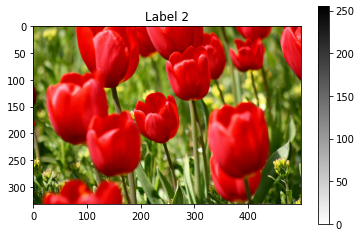

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
for image, label in training_set.take(1):
    break
image = image.numpy()
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title('Label {}'.format(label))
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
IMAGE_RES = 224
def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
    return image, label
BATCH_SIZE = 32
train_batches = training_set.shuffle(num_training//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
print(train_batches)
print(validation_batches)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# EfficientNetB0 feature vector (version 2)
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [ ]:
resnet_feature_extractor = hub.KerasLayer(resnet_url,
                                   input_shape=(IMAGE_RES, IMAGE_RES, 3))
# Freeze the variables in the feature extractor layer, so that the training only modifies the final classifier layer.
resnet_feature_extractor.trainable = False

In [ ]:
# build model
model_5_resnet = tf.keras.Sequential([
  resnet_feature_extractor,
  tf.keras.layers.Dense(num_classes)
])
model_5_resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 23,575,045
Trainable params: 10,245
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
# Compile model
model_5_resnet.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [ ]:
history_5_resnet = model_5_resnet.fit(train_batches,
                    epochs=10,
                    validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 48s 274ms/step - loss: 0.6723 - accuracy: 0.7578 - val_loss: 0.4030 - val_accuracy: 0.8692
Epoch 2/10
92/92 [==============================] - 22s 238ms/step - loss: 0.3334 - accuracy: 0.8907 - val_loss: 0.3374 - val_accuracy: 0.8869
Epoch 3/10
92/92 [==============================] - 22s 238ms/step - loss: 0.2454 - accuracy: 0.9251 - val_loss: 0.3008 - val_accuracy: 0.8992
Epoch 4/10
92/92 [==============================] - 22s 238ms/step - loss: 0.1993 - accuracy: 0.9404 - val_loss: 0.2894 - val_accuracy: 0.8992
Epoch 5/10
92/92 [==============================] - 22s 237ms/step - loss: 0.1621 - accuracy: 0.9547 - val_loss: 0.2795 - val_accuracy: 0.9128
Epoch 6/10
92/92 [==============================] - 22s 238ms/step - loss: 0.1372 - accuracy: 0.9693 - val_loss: 0.2904 - val_accuracy: 0.8978
Epoch 7/10
92/92 [==============================] - 22s 239ms/step - loss: 0.1179 - accuracy: 0.9751 - val_loss: 0.2704 - val_accuracy: 0.9074

In [ ]:
efficientnet_feature_extractor = hub.KerasLayer(efficientnet_url,
                                   input_shape=(IMAGE_RES, IMAGE_RES, 3))
# Freeze the variables in the feature extractor layer, so that the training only modifies the final classifier layer.
efficientnet_feature_extractor.trainable = False

In [ ]:
# build model
model_6_efficientnet = tf.keras.Sequential([
  resnet_feature_extractor,
  tf.keras.layers.Dense(num_classes)
])
model_6_efficientnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 dense_1 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23,575,045
Trainable params: 10,245
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
# Compile model
model_6_efficientnet.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history_6_fficientnet = model_6_efficientnet.fit(train_batches,
                    epochs=10,
                    validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 24s 246ms/step - loss: 0.7225 - accuracy: 0.7313 - val_loss: 0.4114 - val_accuracy: 0.8624
Epoch 2/10
92/92 [==============================] - 22s 239ms/step - loss: 0.3433 - accuracy: 0.8811 - val_loss: 0.3354 - val_accuracy: 0.8801
Epoch 3/10
92/92 [==============================] - 22s 238ms/step - loss: 0.2575 - accuracy: 0.9152 - val_loss: 0.2913 - val_accuracy: 0.9033
Epoch 4/10
92/92 [==============================] - 22s 238ms/step - loss: 0.2048 - accuracy: 0.9349 - val_loss: 0.2762 - val_accuracy: 0.9114
Epoch 5/10
92/92 [==============================] - 22s 237ms/step - loss: 0.1665 - accuracy: 0.9574 - val_loss: 0.2741 - val_accuracy: 0.9142
Epoch 6/10
92/92 [==============================] - 22s 238ms/step - loss: 0.1413 - accuracy: 0.9673 - val_loss: 0.2732 - val_accuracy: 0.9101
Epoch 7/10
92/92 [==============================] - 22s 237ms/step - loss: 0.1227 - accuracy: 0.9734 - val_loss: 0.2673 - val_accuracy: 0.9155

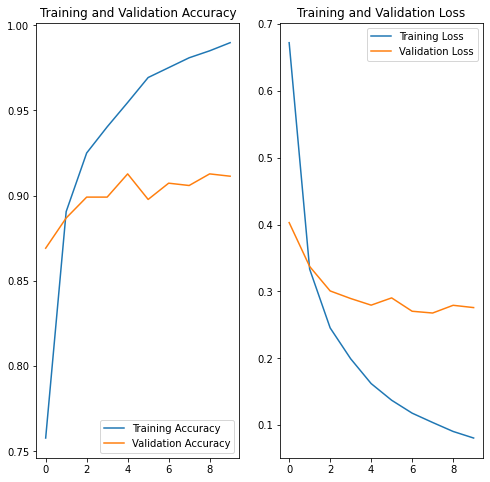

In [ ]:
# Plot train and validation
acc = history_5_resnet.history['accuracy']
val_acc = history_5_resnet.history['val_accuracy']
loss = history_5_resnet.history['loss']
val_loss = history_5_resnet.history['val_loss']
epochs_range = range(10) # 10 epochs
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


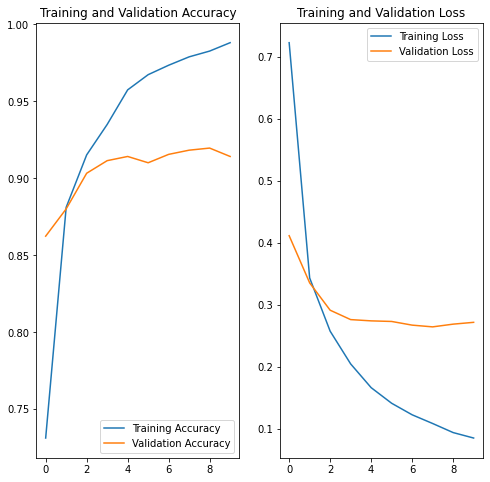

In [ ]:
# Plot train and validation
acc = history_6_fficientnet.history['accuracy']
val_acc = history_6_fficientnet.history['val_accuracy']
loss = history_6_fficientnet.history['loss']
val_loss = history_6_fficientnet.history['val_loss']
epochs_range = range(10) # 10 epochs
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Efficientnet looks better

In [ ]:
class_names = np.array(dataset_info.features['label'].names)
print(class_names)

['dandelion' 'daisy' 'tulips' 'sunflowers' 'roses']


In [ ]:
# Create an Image Batch and Make Predictions

image_batch, label_batch = next(iter(train_batches))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()
predicted_batch = model_6_efficientnet.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
print(predicted_class_names)


NameError: ignored

In [ ]:
print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:            [3 1 4 3 4 1 2 4 4 3 1 4 0 0 2 2 0 2 4 1 4 3 0 2 0 0 2 4 2 3 4 4]
Predicted labels:  [3 1 4 3 4 1 2 4 4 3 1 4 0 0 2 2 0 2 4 1 4 3 0 2 0 0 2 4 2 3 4 4]


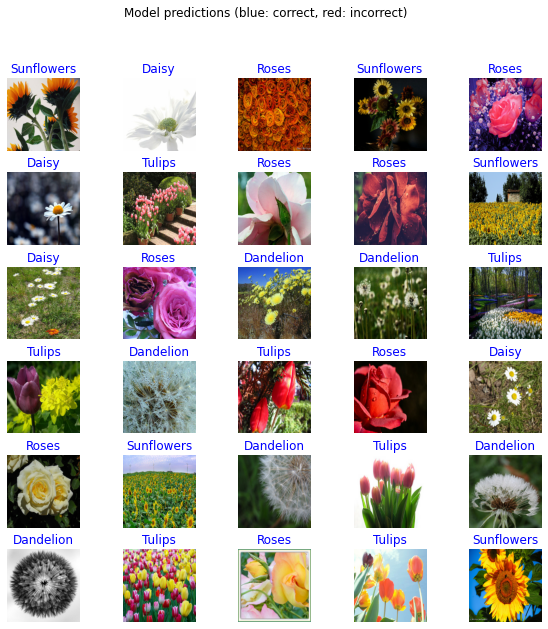

In [ ]:
# Plot model predictions
plt.figure(figsize=(10,10))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(image_batch[n])
    color = "blue" if predicted_ids[n] == label_batch[n] else "red"
    plt.title(predicted_class_names[n].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

### Another way

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE

@tf.function # with @tf.function faster
def scale_resize_image(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (224, 224)) # Resizing the image to 224x224 dimention
    return (image, label)

training_ds = (
    training_set
    .map(scale_resize_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

validation_ds = (
    validation_set
    .map(scale_resize_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

In [ ]:
# build model
model_7_resnet = tf.keras.Sequential([
  resnet_feature_extractor,
  tf.keras.layers.Dense(num_classes)
])
model_7_resnet.summary()

# Compile model
model_7_resnet.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Fit model
history_7_resnet = model_7_resnet.fit(training_ds,
                    epochs=5,
                    validation_data=validation_ds)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 2048)              23564800  
                                                                 
 dense_4 (Dense)             (None, 5)                 10245     
                                                                 
Total params: 23,575,045
Trainable params: 10,245
Non-trainable params: 23,564,800
_________________________________________________________________
Epoch 1/5
92/92 [==============================] - 24s 247ms/step - loss: 0.7185 - accuracy: 0.7323 - val_loss: 0.4065 - val_accuracy: 0.8624
Epoch 2/5
92/92 [==============================] - 22s 239ms/step - loss: 0.3468 - accuracy: 0.8801 - val_loss: 0.3402 - val_accuracy: 0.8856
Epoch 3/5
92/92 [==============================] - 22s 238ms/step - loss: 0.2582 - accuracy: 0.9183 - val_loss: 0.3101 - val_accuracy: 0.8965
Epoch 4

### Try to use code from course

In [ ]:
def create_model(model_url, num_classes=5):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape= (IMAGE_RES, IMAGE_RES)+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

In [ ]:
# Create model
resnet_model = create_model(resnet_url, num_classes=5)

# Compile
resnet_model.compile(loss='categorical_crossentropy', # Need to chnge to sparse categorical crossentropy
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# resnet_history = resnet_model.fit(training_ds,
#                                   epochs=5,
#                                   steps_per_epoch=len(training_ds),
#                                   validation_data=validation_ds,
#                                   validation_steps=len(validation_ds)) 

Epoch 1/5


ValueError: ignored

It's not work because we use  categorical_crossentropy instead sparse categorical crossentropy

  * If our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).


In [ ]:
AUTO = tf.data.experimental.AUTOTUNE

resnet_feature_extractor = hub.KerasLayer(resnet_url, input_shape=(224, 224, 3))
resnet_feature_extractor.trainable = False

@tf.function # with @tf.function faster
def scale_resize_image(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (224, 224)) # Resizing the image to 224x224 dimention
    return (image, label)

training_ds = (
    training_set
    .map(scale_resize_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

validation_ds = (
    validation_set
    .map(scale_resize_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

# build model
model_7_resnet = tf.keras.Sequential([
  resnet_feature_extractor,
  tf.keras.layers.Dense(num_classes)
])

# Compile model
model_7_resnet.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Fit model
history_7_resnet = model_7_resnet.fit(training_ds,
                    epochs=10,
                    validation_data=validation_ds)

Epoch 1/10
92/92 [==============================] - 27s 245ms/step - loss: 0.7431 - accuracy: 0.7132 - val_loss: 0.4393 - val_accuracy: 0.8597
Epoch 2/10
92/92 [==============================] - 22s 239ms/step - loss: 0.3519 - accuracy: 0.8811 - val_loss: 0.3689 - val_accuracy: 0.8815
Epoch 3/10
92/92 [==============================] - 22s 239ms/step - loss: 0.2634 - accuracy: 0.9104 - val_loss: 0.3390 - val_accuracy: 0.8896
Epoch 4/10
92/92 [==============================] - 22s 241ms/step - loss: 0.2100 - accuracy: 0.9346 - val_loss: 0.3225 - val_accuracy: 0.8965
Epoch 5/10
92/92 [==============================] - 22s 239ms/step - loss: 0.1731 - accuracy: 0.9527 - val_loss: 0.3137 - val_accuracy: 0.8992
Epoch 6/10
92/92 [==============================] - 22s 239ms/step - loss: 0.1461 - accuracy: 0.9632 - val_loss: 0.3092 - val_accuracy: 0.9046
Epoch 7/10
92/92 [==============================] - 22s 239ms/step - loss: 0.1256 - accuracy: 0.9741 - val_loss: 0.3068 - val_accuracy: 0.9128

In [ ]:
def create_model(model_url, num_classes=5):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape= (IMAGE_RES, IMAGE_RES)+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model
  
  # Create model
resnet_model = create_model(resnet_url, num_classes=5)
# Compile
resnet_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])
# Fit
resnet_history = resnet_model.fit(training_ds,
                                  epochs=5,
                                  # steps_per_epoch=len(training_ds),
                                  validation_data=validation_ds)#,
                                  #validation_steps=len(validation_ds)) 


Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 27s 247ms/step - loss: 0.7296 - accuracy: 0.7326 - val_loss: 0.4266 - val_accuracy: 0.8569
Epoch 2/5
92/92 [==============================] - 22s 239ms/step - loss: 0.3472 - accuracy: 0.8839 - val_loss: 0.3507 - val_accuracy: 0.8828
Epoch 3/5
92/92 [==============================] - 22s 238ms/step - loss: 0.2579 - accuracy: 0.9176 - val_loss: 0.3178 - val_accuracy: 0.8815
Epoch 4/5
92/92 [==============================] - 22s 238ms/step - loss: 0.2056 - accuracy: 0.9424 - val_loss: 0.3000 - val_accuracy: 0.8883
Epoch 5/5
92/92 [==============================] - 22s 239ms/step - loss: 0.1695 - accuracy: 0.9547 - val_loss: 0.2905 - val_accuracy: 0.8937


### Fine tuning (unlock last layers in transfer learning model)

In [ ]:
efficientnetB0 = tf.keras.applications.EfficientNetB0(include_top=False)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
efficientnetB7 = tf.keras.applications.EfficientNetB7(include_top=False)

258088960/258076736 [==============================] - 2s 0us/step


In [ ]:
# Make model trainable
efficientnetB0.trainable = True

# Freeze all layers except for the last 10
for layer in efficientnetB0.layers[:-10]:
  layer.trainable = False


In [ ]:
# Make model trainable
efficientnetB7.trainable = True

# Freeze all layers except for the last 10
for layer in efficientnetB7.layers[:-10]:
  layer.trainable = False

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE

resnet_feature_extractor = hub.KerasLayer(resnet_url, input_shape=(224, 224, 3))
resnet_feature_extractor.trainable = False

@tf.function # with @tf.function faster
def scale_resize_image(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (224, 224)) # Resizing the image to 224x224 dimention
    return (image, label)

training_ds = (
    training_set
    .map(scale_resize_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

validation_ds = (
    validation_set
    .map(scale_resize_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

# build model
model_7_resnet = tf.keras.Sequential([
  resnet_feature_extractor,
  tf.keras.layers.Dense(num_classes)
])

# Compile model
model_7_resnet.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Fit model
history_7_resnet = model_7_resnet.fit(training_ds,
                    epochs=10,
                    validation_data=validation_ds)

In [ ]:
# efficientnetB0

# Create a functional model with data augmentation 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)


# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = efficientnetB0(x) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_8 = tf.keras.Model(inputs, outputs)

# Compile
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(lr=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_model_8 = model_8.fit(training_ds,
                    epochs=10,
                    validation_data=validation_ds)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 62s 573ms/step - loss: 1.6182 - accuracy: 0.2360 - val_loss: 1.9463 - val_accuracy: 0.2166
Epoch 2/10
92/92 [==============================] - 41s 449ms/step - loss: 1.6122 - accuracy: 0.2442 - val_loss: 1.6332 - val_accuracy: 0.2534
Epoch 3/10
92/92 [==============================] - 42s 457ms/step - loss: 1.6117 - accuracy: 0.2316 - val_loss: 2.5397 - val_accuracy: 0.1880
Epoch 4/10
92/92 [==============================] - 39s 419ms/step - loss: 1.6090 - accuracy: 0.2388 - val_loss: 1.7275 - val_accuracy: 0.2166
Epoch 5/10
92/92 [==============================] - 33s 357ms/step - loss: 1.6112 - accuracy: 0.2456 - val_loss: 1.8529 - val_accuracy: 0.1635
Epoch 6/10
92/92 [==============================] - 32s 349ms/step - loss: 1.6057 - accuracy: 0.2347 - val_loss: 1.8069 - val_accuracy: 0.1635
Epoch 7/10
92/92 [==============================] - 32s 347ms/step - loss: 1.6117 - accuracy: 0.2354 - val_loss: 1.8258 - val_accuracy: 0.2166
Epoch 8/10

In [ ]:
# efficientnetB0

# Create a functional model with data augmentation 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)


# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = efficientnetB0(x) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(5, activation="softmax", name="output_layer")(x)
model_8 = tf.keras.Model(inputs, outputs)

# Compile
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # from_logits=True removed
              optimizer=tf.keras.optimizers.Adam(lr=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])

history_model_8 = model_8.fit(training_ds,
                    epochs=10,
                    validation_data=validation_ds)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


92/92 [==============================] - 40s 346ms/step - loss: 1.6116 - accuracy: 0.2381 - val_loss: 1.8582 - val_accuracy: 0.2166
Epoch 2/10
92/92 [==============================] - 27s 290ms/step - loss: 1.6081 - accuracy: 0.2411 - val_loss: 1.9304 - val_accuracy: 0.2166
Epoch 3/10
92/92 [==============================] - 27s 297ms/step - loss: 1.6098 - accuracy: 0.2285 - val_loss: 1.9602 - val_accuracy: 0.2166
Epoch 4/10
92/92 [==============================] - 27s 293ms/step - loss: 1.6061 - accuracy: 0.2517 - val_loss: 1.9120 - val_accuracy: 0.2166
Epoch 5/10
16/92 [====>.........................] - ETA: 17s - loss: 1.6017 - accuracy: 0.2402

In [ ]:
# efficientnetB0

# Create a functional model with data augmentation 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# # Build data augmentation layer
# data_augmentation = Sequential([
#   preprocessing.RandomFlip('horizontal'),
#   preprocessing.RandomHeight(0.2),
#   preprocessing.RandomWidth(0.2),
#   preprocessing.RandomZoom(0.2),
#   preprocessing.RandomRotation(0.2),
#   # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
# ], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)


# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
# x = data_augmentation(inputs) # augment our training images       # Removed augmentation
x = efficientnetB0(inputs) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(5,  name="output_layer")(x) # removed activation="softmax",
model_8 = tf.keras.Model(inputs, outputs)

# Compile
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # from_logits=True removed
              optimizer=tf.keras.optimizers.Adam(lr=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])

history_model_8 = model_8.fit(training_ds,
                    epochs=10,
                    validation_data=validation_ds)

In [ ]:
# efficientnetB7

# Create a functional model with data augmentation 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# # Build data augmentation layer
# data_augmentation = Sequential([
#   preprocessing.RandomFlip('horizontal'),
#   preprocessing.RandomHeight(0.2),
#   preprocessing.RandomWidth(0.2),
#   preprocessing.RandomZoom(0.2),
#   preprocessing.RandomRotation(0.2),
#   # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
# ], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)


# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
# x = data_augmentation(inputs) # augment our training images
x = efficientnetB7(inputs) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(5,  name="output_layer")(x) # activation="softmax", removed
model_8 = tf.keras.Model(inputs, outputs)

# Compile
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(), # STANDART LR
              metrics=["accuracy"])

history_model_8 = model_8.fit(training_ds,
                    epochs=10,
                    validation_data=validation_ds)

Epoch 1/10
92/92 [==============================] - 1435s 15s/step - loss: 1.6304 - accuracy: 0.2265 - val_loss: 1.7594 - val_accuracy: 0.1635
Epoch 2/10
92/92 [==============================] - 1445s 16s/step - loss: 1.6172 - accuracy: 0.2340 - val_loss: 1.6796 - val_accuracy: 0.1635
Epoch 3/10
92/92 [==============================] - 1434s 16s/step - loss: 1.6171 - accuracy: 0.2299 - val_loss: 1.6425 - val_accuracy: 0.1785
Epoch 4/10
92/92 [==============================] - 1447s 16s/step - loss: 1.6092 - accuracy: 0.2425 - val_loss: 1.6192 - val_accuracy: 0.2166
Epoch 5/10
92/92 [==============================] - 1499s 16s/step - loss: 1.6072 - accuracy: 0.2463 - val_loss: 1.6702 - val_accuracy: 0.1635
Epoch 6/10
92/92 [==============================] - 1483s 16s/step - loss: 1.6097 - accuracy: 0.2425 - val_loss: 1.6356 - val_accuracy: 0.1635
Epoch 7/10
92/92 [==============================] - 1480s 16s/step - loss: 1.6071 - accuracy: 0.2401 - val_loss: 1.6389 - val_accuracy: 0.1635

KeyboardInterrupt: ignored

**First**, if you keep this integer target or label, you should use ***sparse_categorical_accuracy*** for accuracy and ***sparse_categorical_crossentropy*** for loss function. But if you transform your integer label to a **one-hot encoded vector**, then you should use ***categorical_accuracy*** for accuracy, and ***categorical_crossentropy*** for loss function. As these data set have integer labels, you can choose **sparse_categorical** or you can transform the label to one-hot in order to use ***categorical***.

**Second**, if you set ***outputs = keras.layers.Dense(102, activation='softmax')(x)*** to the last layer, you will get **probabilities score**. But if you set ***outputs = keras.layers.Dense(102)(x)***, then you will get **logits**. So, if you set **activations='softmax'**, then you should not use **from_logit = True**. 


In [ ]:
# efficientnetB7

# Create a functional model with data augmentation 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# # Build data augmentation layer
# data_augmentation = Sequential([
#   preprocessing.RandomFlip('horizontal'),
#   preprocessing.RandomHeight(0.2),
#   preprocessing.RandomWidth(0.2),
#   preprocessing.RandomZoom(0.2),
#   preprocessing.RandomRotation(0.2),
#   # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
# ], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)


# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
# x = data_augmentation(inputs) # augment our training images
x = efficientnetB7(inputs) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(5,  activation="softmax", name="output_layer")(x) # activation="softmax", ADDED
model_8 = tf.keras.Model(inputs, outputs)

# Compile
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # from_logits=True REMOVED
              optimizer=tf.keras.optimizers.Adam(), # STANDART LR
              metrics=["accuracy"])

history_model_8 = model_8.fit(training_ds,
                    epochs=10,
                    validation_data=validation_ds)

Epoch 1/10
92/92 [==============================] - 1549s 17s/step - loss: 1.6130 - accuracy: 0.2371 - val_loss: 1.6989 - val_accuracy: 0.1635
Epoch 2/10
92/92 [==============================] - 1498s 16s/step - loss: 1.6103 - accuracy: 0.2394 - val_loss: 1.6238 - val_accuracy: 0.2166
Epoch 3/10
92/92 [==============================] - 1496s 16s/step - loss: 1.6056 - accuracy: 0.2483 - val_loss: 1.6299 - val_accuracy: 0.1880
Epoch 4/10
92/92 [==============================] - 1525s 17s/step - loss: 1.6086 - accuracy: 0.2374 - val_loss: 1.6232 - val_accuracy: 0.2248
Epoch 5/10
92/92 [==============================] - 1497s 16s/step - loss: 1.6088 - accuracy: 0.2405 - val_loss: 1.6120 - val_accuracy: 0.2166
Epoch 6/10
92/92 [==============================] - 1514s 16s/step - loss: 1.6072 - accuracy: 0.2364 - val_loss: 1.6430 - val_accuracy: 0.2166
Epoch 7/10
 5/92 [>.............................] - ETA: 18:33 - loss: 1.6051 - accuracy: 0.2125

In [ ]:
# 2 With augmentation layer

In [ ]:
# efficientnetB7

# Create a functional model with data augmentation 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)


# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = efficientnetB7(x) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(5,  name="output_layer")(x) # activation="softmax", removed
model_8 = tf.keras.Model(inputs, outputs)

# Compile
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(), # STANDART LR
              metrics=["accuracy"])

history_model_8 = model_8.fit(training_ds,
                    epochs=10,
                    validation_data=validation_ds)

Epoch 1/10
92/92 [==============================] - 146s 1s/step - loss: 1.6387 - accuracy: 0.2272 - val_loss: 1.7093 - val_accuracy: 0.2166
Epoch 2/10
92/92 [==============================] - 82s 892ms/step - loss: 1.6217 - accuracy: 0.2343 - val_loss: 1.7172 - val_accuracy: 0.1635
Epoch 3/10
92/92 [==============================] - 77s 828ms/step - loss: 1.6183 - accuracy: 0.2316 - val_loss: 1.6572 - val_accuracy: 0.1635
Epoch 4/10
92/92 [==============================] - 74s 801ms/step - loss: 1.6107 - accuracy: 0.2418 - val_loss: 1.6560 - val_accuracy: 0.1635
Epoch 5/10
92/92 [==============================] - 69s 753ms/step - loss: 1.6145 - accuracy: 0.2262 - val_loss: 1.6827 - val_accuracy: 0.1635
Epoch 6/10
92/92 [==============================] - 67s 732ms/step - loss: 1.6117 - accuracy: 0.2333 - val_loss: 1.6186 - val_accuracy: 0.2166
Epoch 7/10
92/92 [==============================] - 72s 780ms/step - loss: 1.6093 - accuracy: 0.2452 - val_loss: 1.6114 - val_accuracy: 0.2166
E

In [ ]:
# efficientnetB7

# Create a functional model with data augmentation 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)


# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = efficientnetB7(x) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(5,  activation="softmax", name="output_layer")(x) # activation="softmax", ADDED
model_8 = tf.keras.Model(inputs, outputs)

# Compile
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # from_logits=True REMOVED
              optimizer=tf.keras.optimizers.Adam(), # STANDART LR
              metrics=["accuracy"])

history_model_8 = model_8.fit(training_ds,
                    epochs=10,
                    validation_data=validation_ds)

Epoch 1/10
92/92 [==============================] - 92s 729ms/step - loss: 1.6181 - accuracy: 0.2323 - val_loss: 1.6152 - val_accuracy: 0.2166
Epoch 2/10
92/92 [==============================] - 60s 649ms/step - loss: 1.6170 - accuracy: 0.2340 - val_loss: 1.7894 - val_accuracy: 0.1880
Epoch 3/10
92/92 [==============================] - 64s 694ms/step - loss: 1.6107 - accuracy: 0.2381 - val_loss: 1.7353 - val_accuracy: 0.1635
Epoch 4/10
92/92 [==============================] - 60s 655ms/step - loss: 1.6133 - accuracy: 0.2411 - val_loss: 1.6202 - val_accuracy: 0.2166
Epoch 5/10
92/92 [==============================] - 57s 620ms/step - loss: 1.6075 - accuracy: 0.2456 - val_loss: 1.6325 - val_accuracy: 0.2166
Epoch 6/10
92/92 [==============================] - 57s 626ms/step - loss: 1.6063 - accuracy: 0.2452 - val_loss: 1.6097 - val_accuracy: 0.2166
Epoch 7/10
92/92 [==============================] - 56s 609ms/step - loss: 1.6097 - accuracy: 0.2394 - val_loss: 1.6292 - val_accuracy: 0.1635

# (4) Natural language processing (NLP)


*   Build natural language processing systems using TensorFlow. ✅
*   Prepare text to use in TensorFlow models.
*   Build models that identify the category of a piece of text using binary categorization ✅
*   Build models that identify the category of a piece of text using multi-class categorization
*   Use word embeddings in your TensorFlow model.
*   Use LSTMs in your model to classify text for either binary or multi-class categorization.
*   Add RNN and GRU layers to your mode
*   Use RNNS, LSTMs, GRUs and CNNs in models that work with text.
*   Train LSTMs on existing text to generate text (such as songs and poetry) 


**DONT FORGET USE Text vectorization (tokenization) AND EMBEDDINGS**

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/09_SkimLit_nlp_milestone_project_2.ipynb


**def preprocess_text_with_line_numbers(filename):**

good for preproccessing ideas

Steps:

Text -> turn into numbers -> build a model -> train the model to find patterns -> use patterns (make predictions)

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/Nikitaion/TensorFlowLearning/main/extras/helper_functions.py

--2022-04-05 06:40:30--  https://raw.githubusercontent.com/Nikitaion/TensorFlowLearning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-04-05 06:40:30 (28.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
import numpy as np

import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print(tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

2.8.0
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


In [ ]:
# Download dataset
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True) #
                                  # batch size - int, if set, add a batch dimension to examples. Note that variable length features will be 0-padded. If batch_size=-1, will return the full dataset as tf.Tensors.

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDQ5QFG/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDQ5QFG/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDQ5QFG/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [ ]:
train_data

(<tf.Tensor: shape=(25000,), dtype=string, numpy=
 array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
        b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I

In [ ]:
tfds.as_numpy(train_data)

(array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
        b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plo

### Explore the data

In [ ]:
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 25000, test entries: 25000


In [ ]:
train_examples[:10]

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

In [ ]:
train_labels[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
np.unique(train_labels, return_counts=True)

(array([0, 1]), array([12500, 12500]))

### Build the model (https://www.tensorflow.org/hub/tutorials/tf2_text_classification way)
Let's build a model using transfer learning. For this I will use model from TensorflowHub: https://tfhub.dev/google/nnlm-en-dim50/2

Note that the output shape of the produced embeddings is a expected: (num_examples, embedding_dimension).

In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
# View first 3 examples using nnlm-en-dim50
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423195 , -0.0119017 ,  0.06337538,  0.06862972, -0.16776837,
        -0.10581174,  0.16865303, -0.04998824, -0.31148055,  0.07910346,
         0.15442263,  0.01488662,  0.03930153,  0.19772711, -0.12215476,
        -0.04120981, -0.2704109 , -0.21922152,  0.26517662, -0.80739075,
         0.25833532, -0.3100421 ,  0.28683215,  0.1943387 , -0.29036492,
         0.03862849, -0.7844411 , -0.0479324 ,  0.4110299 , -0.36388892,
        -0.58034706,  0.30269456,  0.3630897 , -0.15227164, -0.44391504,
         0.19462997,  0.19528408,  0.05666234,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201318 , -0.04418665, -0.08550783,
        -0.55847436, -0.23336391, -0.20782952, -0.03543064, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862679,  0.7753425 , -0.07667089,
        -0.15752277,  0.01872335, -0.08169781, -0.3521876 ,  0.4637341 ,
        -0.08492756,  0.07166859, -0.00670817,  0.12686075, -0.19326553,
 

In [ ]:
# Build model
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


The layers are stacked sequentially to build the classifier:


1.   The first layer is a TensorFlow Hub layer. This layer uses a pre-trained Saved Model to map a sentence into its embedding vector. The model that we are using (google/nnlm-en-dim50/2) splits the sentence into tokens, embeds each token and then combines the embedding. The resulting dimensions are: (num_examples, embedding_dimension).
2.   This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units.
3.   The last layer is densely connected with a single output node. This outputs logits: the log-odds of the true class, according to the model.

In [ ]:
model.compile(optimizer="adam",
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name="accuracy")])

In [ ]:
# Create validation set
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

len(train_examples), len(x_val), len(partial_x_train), len(y_val), len(partial_y_train)

(25000, 10000, 15000, 10000, 15000)

In [ ]:
# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 29s 914ms/step - loss: 0.7267 - accuracy: 0.5415 - val_loss: 0.6681 - val_accuracy: 0.6292
Epoch 2/40
30/30 [==============================] - 25s 827ms/step - loss: 0.6268 - accuracy: 0.7269 - val_loss: 0.5949 - val_accuracy: 0.7577
Epoch 3/40
30/30 [==============================] - 25s 824ms/step - loss: 0.5312 - accuracy: 0.8142 - val_loss: 0.5003 - val_accuracy: 0.8072
Epoch 4/40
30/30 [==============================] - 26s 880ms/step - loss: 0.4017 - accuracy: 0.8691 - val_loss: 0.3921 - val_accuracy: 0.8445
Epoch 5/40
30/30 [==============================] - 26s 877ms/step - loss: 0.2771 - accuracy: 0.9085 - val_loss: 0.3290 - val_accuracy: 0.8646
Epoch 6/40
30/30 [==============================] - 25s 822ms/step - loss: 0.1971 - accuracy: 0.9390 - val_loss: 0.3047 - val_accuracy: 0.8739
Epoch 7/40
30/30 [==============================] - 24s 818ms/step - loss: 0.1428 - accuracy: 0.9600 - val_loss: 0.2956 - val_accuracy: 0.8780

In [ ]:
# Evaluate the model
results = model.evaluate(test_examples, test_labels)

print(results)
# This fairly naive approach achieves an accuracy of about 87%. With more advanced approaches, the model should get closer to 95%.

782/782 [==============================] - 50s 64ms/step - loss: 0.6055 - accuracy: 0.8464
[0.6055172681808472, 0.8464000225067139]


In [ ]:
# Create a graph of accuracy and loss over time
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
epochs = range(1, len(acc) + 1)

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

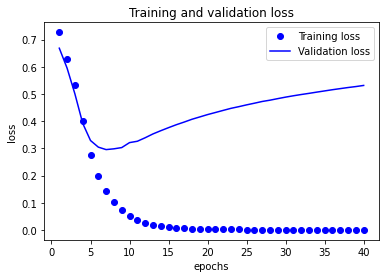

In [ ]:
# "bo" - is for "blue dot"
plt.plot(epochs, loss, "bo", label="Training loss")
# "b" is for "solid blue line"
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.show()

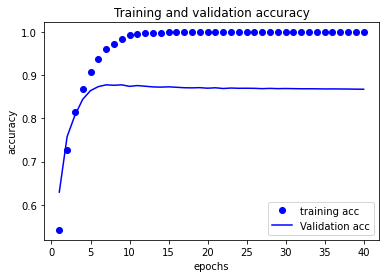

In [ ]:
plt.plot(epochs, acc, "bo", label="training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

In [ ]:
# Model overfitted

In [ ]:
# Build model
model2 = tf.keras.Sequential()
model2.add(hub_layer)
model2.add(tf.keras.layers.Dense(16, activation="relu"))
model2.add(tf.keras.layers.Dense(16, activation="relu"))
model2.add(tf.keras.layers.Dense(1))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense_8 (Dense)             (None, 16)                816       
                                                                 
 dense_9 (Dense)             (None, 16)                272       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 48,191,705
Trainable params: 48,191,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model2.compile(optimizer="adam",
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name="accuracy")])

# Train the model
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
469/469 [==============================] - 269s 573ms/step - loss: 0.1338 - accuracy: 0.9795 - val_loss: 0.4519 - val_accuracy: 0.8671
Epoch 2/20
469/469 [==============================] - 265s 565ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.5421 - val_accuracy: 0.8669
Epoch 3/20
469/469 [==============================] - 261s 557ms/step - loss: 4.5144e-04 - accuracy: 1.0000 - val_loss: 0.5873 - val_accuracy: 0.8679
Epoch 4/20
469/469 [==============================] - 261s 557ms/step - loss: 2.0954e-04 - accuracy: 1.0000 - val_loss: 0.6249 - val_accuracy: 0.8684
Epoch 5/20
469/469 [==============================] - 267s 569ms/step - loss: 1.2054e-04 - accuracy: 1.0000 - val_loss: 0.6565 - val_accuracy: 0.8680
Epoch 6/20
469/469 [==============================] - 265s 565ms/step - loss: 7.5396e-05 - accuracy: 1.0000 - val_loss: 0.6851 - val_accuracy: 0.8678
Epoch 7/20
469/469 [==============================] - 266s 567ms/step - loss: 4.9885e-05 - accuracy: 1.0000 

In [ ]:
# Evaluate the model
results = model2.evaluate(test_examples, test_labels)

print(results)


782/782 [==============================] - 55s 71ms/step - loss: 1.1251 - accuracy: 0.8445
[1.1250959634780884, 0.8444799780845642]


### Another way

In [ ]:
train_examples[:10]

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

In [ ]:
# train_data to dataframe

train_dataframe = pd.DataFrame(data = {'reviews': train_examples, 'labels': train_labels}) 
train_dataframe.dtypes

reviews    object
labels      int64
dtype: object

In [ ]:
train_dataframe['reviews'] = train_dataframe['reviews'].astype(str)
train_dataframe.dtypes

reviews    object
labels      int64
dtype: object

In [ ]:
# ПОЧИТСТИТЬ ТЕКСТ ОТ b' b" <br> </br> и символов...

In [ ]:
# Get frequency distribution of the words in the text
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

reviews = train_dataframe.reviews.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(reviews)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)

# Get top 50 words
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
144486


['the',
 ',',
 '.',
 'and',
 'a',
 'of',
 'to',
 'is',
 '/',
 '>',
 '<',
 'br',
 'in',
 'I',
 'it',
 'that',
 "'s",
 'this',
 "''",
 'was',
 'as',
 'The',
 'with',
 'for',
 'movie',
 'film',
 ')',
 '(',
 'but',
 'on',
 '``',
 'are',
 'not',
 'you',
 'his',
 'have',
 'be',
 '!',
 "'",
 'one',
 'he',
 'at',
 'by',
 'all',
 'an',
 'who',
 'from',
 'like',
 'they',
 'her']

Here we have many stop words ( A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. ), punctuation and "br"

Let's remove them

In [ ]:
# Download list of stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
len(stop_words), stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(179,
 {'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',
  'm',
  'ma',
  'me',
  'mightn',
  "mightn't",
  'more',
  'most',
  'mustn',
  "mustn't",
  'my',
  'myself',
  'needn',
  "needn't",
  'no',
  'nor',
  'not',
  'now',
  'o',
  'of',
  'o

In [ ]:
# add br to set of stopwords
stop_words.add("br")
stop_words.add("<br />")
stop_words.add("<br>")

len(stop_words)

182

In [ ]:
# Stopwords removing
train_dataframe['reviews'] = train_dataframe['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
train_dataframe.head()

,reviews,labels
0,"b""This absolutely terrible movie. Don't lured ...",0
1,"b'I known fall asleep films, usually due combi...",0
2,b'Mann photographs Alberta Rocky Mountains sup...,0
3,b'This kind film snowy Sunday afternoon rest w...,1
4,"b'As others mentioned, women go nude film most...",1


In [ ]:
# Get frequency distribution of the words in the text
reviews = train_dataframe.reviews.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(reviews)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)

# Get top 50 words
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

144487


[',',
 '.',
 '/',
 '>',
 '<',
 'br',
 'I',
 "'s",
 "''",
 'The',
 'movie',
 'film',
 ')',
 '(',
 '``',
 '!',
 "'",
 'one',
 'like',
 '?',
 'It',
 'good',
 'This',
 'b',
 '...',
 'would',
 'time',
 'really',
 'it',
 'story',
 'even',
 'see',
 ':',
 '-',
 'much',
 'get',
 'people',
 'bad',
 'great',
 'made',
 'well',
 'first',
 'also',
 'could',
 'make',
 'way',
 'But',
 'movies',
 'think',
 'characters']

br doesn't go away because in this example tag br with <> - it's part of words. And need to remove "b'" in a stars of sentences

Maybe i find the way to delete it later. but now let's remove punctuation

In [ ]:
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
train_dataframe.reviews = train_dataframe.reviews.apply(lambda x:remove_punctuation(x))
train_dataframe.head()

,reviews,labels
0,bThis absolutely terrible movie Dont lured Chr...,0
1,bI known fall asleep films usually due combina...,0
2,bMann photographs Alberta Rocky Mountains supe...,0
3,bThis kind film snowy Sunday afternoon rest wo...,1
4,bAs others mentioned women go nude film mostly...,1


In [ ]:
# Get frequency distribution of the words in the text
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

reviews = train_dataframe.reviews.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(reviews)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)

# Get top 50 words
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
146109


['I',
 'br',
 'The',
 'movie',
 'film',
 'one',
 'like',
 'good',
 'would',
 'It',
 'time',
 'This',
 'really',
 'story',
 'even',
 'see',
 'it',
 'much',
 'get',
 'people',
 'bad',
 'great',
 'made',
 'first',
 'well',
 'also',
 'make',
 'films',
 'movies',
 'could',
 'way',
 'But',
 'characters',
 'think',
 'And',
 'Its',
 'seen',
 'character',
 'watch',
 'many',
 'its',
 'two',
 'plot',
 'acting',
 'never',
 'little',
 'know',
 'best',
 'love',
 'show']

Punctuation removed

In [ ]:
# Try remove br again
train_dataframe['reviews'] = train_dataframe['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in ("br")]))
train_dataframe.head()

# Get frequency distribution of the words in the text
reviews = train_dataframe.reviews.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(reviews)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)

# Get top 50 words
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

146106


['I',
 'The',
 'movie',
 'film',
 'one',
 'like',
 'good',
 'would',
 'It',
 'time',
 'This',
 'really',
 'story',
 'even',
 'see',
 'it',
 'much',
 'get',
 'people',
 'bad',
 'great',
 'made',
 'first',
 'well',
 'also',
 'make',
 'films',
 'movies',
 'could',
 'way',
 'But',
 'characters',
 'think',
 'And',
 'Its',
 'seen',
 'character',
 'watch',
 'many',
 'its',
 'two',
 'plot',
 'acting',
 'never',
 'little',
 'know',
 'best',
 'love',
 'show',
 'life']

looks better

Let's try to train same model with new train data

In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)

In [ ]:
# Build model
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_2 (Dense)             (None, 16)                816       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name="accuracy")])

In [ ]:
# Create validation set
x_val = train_dataframe.reviews[:10000]
partial_x_train = train_dataframe.reviews[10000:]

y_val = train_dataframe.labels[:10000]
partial_y_train = train_dataframe.labels[10000:]

len(train_dataframe.reviews), len(x_val), len(partial_x_train), len(y_val), len(partial_y_train)

(25000, 10000, 15000, 10000, 15000)

In [ ]:
# Train the model
history_clean_data = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 19s 593ms/step - loss: 0.6454 - accuracy: 0.6604 - val_loss: 0.5858 - val_accuracy: 0.7766
Epoch 2/40
30/30 [==============================] - 17s 577ms/step - loss: 0.5070 - accuracy: 0.8354 - val_loss: 0.4623 - val_accuracy: 0.8351
Epoch 3/40
30/30 [==============================] - 17s 576ms/step - loss: 0.3610 - accuracy: 0.8896 - val_loss: 0.3584 - val_accuracy: 0.8644
Epoch 4/40
30/30 [==============================] - 17s 578ms/step - loss: 0.2448 - accuracy: 0.9250 - val_loss: 0.2993 - val_accuracy: 0.8812
Epoch 5/40
30/30 [==============================] - 17s 579ms/step - loss: 0.1657 - accuracy: 0.9530 - val_loss: 0.2742 - val_accuracy: 0.8884
Epoch 6/40
30/30 [==============================] - 17s 581ms/step - loss: 0.1123 - accuracy: 0.9719 - val_loss: 0.2648 - val_accuracy: 0.8908
Epoch 7/40
30/30 [==============================] - 17s 571ms/step - loss: 0.0766 - accuracy: 0.9836 - val_loss: 0.2661 - val_accuracy: 0.8914

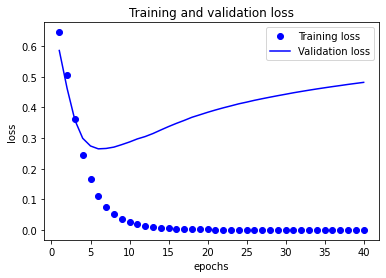

In [ ]:
# Create a graph of accuracy and loss over time
history_dict = history_clean_data.history
history_dict.keys()



acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]


epochs = range(1, len(acc) + 1)


# "bo" - is for "blue dot"
plt.plot(epochs, loss, "bo", label="Training loss")
# "b" is for "solid blue line"
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.show()

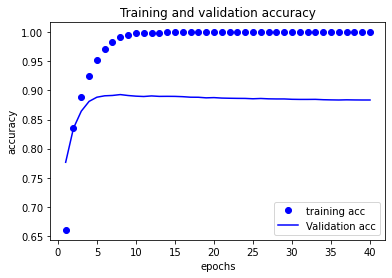

In [ ]:
plt.plot(epochs, acc, "bo", label="training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

## Converting text into numbers

In NLP, there are two main concepts for turning text into numbers:
* **Tokenization** - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
  1. Using **word-level tokenization** with the sentence "I love TensorFlow" might result in "I" being `0`, "love" being `1` and "TensorFlow" being `2`. In this case, every word in a sequence considered a single **token**.
  2. **Character-level tokenization**, such as converting the letters A-Z to values `1-26`. In this case, every character in a sequence considered a single **token**.
  3. **Sub-word tokenization** is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every word could be considered multiple **tokens**.
* **Embeddings** - An embedding is a representation of natural language which can be learned. Representation comes in the form of a **feature vector**. For example, the word "dance" could be represented by the 5-dimensional vector `[-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]`. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings: 
  1. **Create your own embedding** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as [`tf.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)) and an embedding representation will be learned during model training.
  2. **Reuse a pre-learned embedding** - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-tokenization-vs-embedding.png)
*Example of **tokenization** (straight mapping from word to number) and **embedding** (richer representation of relationships between tokens).*

> 🤔 **Question:** What level of tokenzation should I use? What embedding should should I choose?

It depends on your problem. You could try character-level tokenization/embeddings and word-level tokenization/embeddings and see which perform best. You might even want to try stacking them (e.g. combining the outputs of your embedding layers using [`tf.keras.layers.concatenate`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/concatenate)). 

If you're looking for pre-trained word embeddings, [Word2vec embeddings](http://jalammar.github.io/illustrated-word2vec/), [GloVe embeddings](https://nlp.stanford.edu/projects/glove/) and many of the options available on [TensorFlow Hub](https://tfhub.dev/s?module-type=text-embedding) are great places to start.

> 🔑 **Note:** Much like searching for a pre-trained computer vision model, you can search for pre-trained word embeddings to use for your problem. Try searching for something like "use pre-trained word embeddings in TensorFlow".

# (5) Time series, sequences and predictions


*   Train, tune and use time series, sequence and prediction models
*   Train models to predict values for both univariate and multivariate time series.
*   Prepare data for time series learning.
*   Understand Mean Absolute Error (MAE) and how it can be used to evaluate accuracy of sequence models.
*   Use RNNs and CNNs for time series, sequence and forecasting models
*   Identify when to use trailing versus centred windows
*   Use TensorFlow for forecasting
*   Prepare features and labels
*   Identify and compensate for sequence bias
*   Adjust the learning rate dynamically in time series, sequence and prediction models

In [19]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt


In [20]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/Nikitaion/TensorFlowLearning/main/tf_exam_preparation/Sunspots.csv \
    -O /tmp/sunspots.csv


--2022-04-06 17:57:13--  https://raw.githubusercontent.com/Nikitaion/TensorFlowLearning/main/tf_exam_preparation/Sunspots.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70827 (69K) [text/plain]
Saving to: ‘/tmp/sunspots.csv’

/tmp/sunspots.csv   100%[===================>]  69.17K  --.-KB/s    in 0.01s   

2022-04-06 17:57:13 (5.46 MB/s) - ‘/tmp/sunspots.csv’ saved [70827/70827]



In [21]:
import csv
time_step = []
sunspots = []

with open('/tmp/sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(sunspots)
time = np.array(time_step)
print('series: {}'.format(series[:5]))
print('time: {}'.format(time[:5]))


series: [ 96.7 104.3 116.7  92.8 141.7]
time: [0 1 2 3 4]


In [22]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)


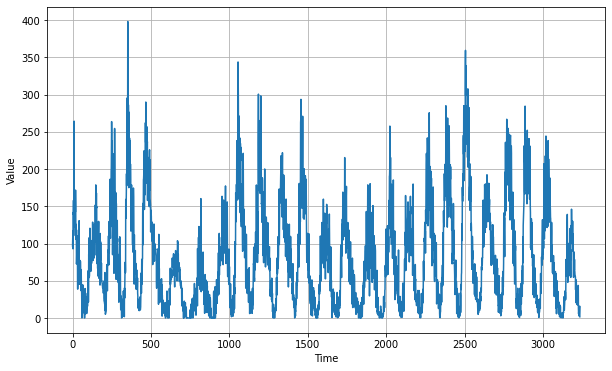

In [23]:
plt.figure(figsize=(10, 6))
plot_series(time, series)


In [40]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [25]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)


In [26]:
tf.random.set_seed(51)
np.random.seed(51)
shuffle_buffer_size = 1000
window_size = 60
batch_size = 100
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(x_train.shape)


(3000,)


In [27]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])
model1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, None, 60)          360       
                                                                 
 lstm_6 (LSTM)               (None, None, 60)          29040     
                                                                 
 lstm_7 (LSTM)               (None, None, 60)          29040     
                                                                 
 dense_9 (Dense)             (None, None, 30)          1830      
                                                                 
 dense_10 (Dense)            (None, None, 10)          310       
                                                                 
 dense_11 (Dense)            (None, None, 1)           11        
                                                                 
 lambda_3 (Lambda)           (None, None, 1)          

In [28]:
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model1.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae", "accuracy"])
history1 = model1.fit(train_set,epochs=500)


Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


30/30 [==============================] - 4s 18ms/step - loss: 38.9172 - mae: 39.4135 - accuracy: 0.0053
Epoch 2/500
30/30 [==============================] - 1s 18ms/step - loss: 25.7615 - mae: 26.2559 - accuracy: 0.0012
Epoch 3/500
30/30 [==============================] - 1s 18ms/step - loss: 22.0742 - mae: 22.5679 - accuracy: 0.0016
Epoch 4/500
30/30 [==============================] - 1s 17ms/step - loss: 20.4514 - mae: 20.9442 - accuracy: 0.0040
Epoch 5/500
30/30 [==============================] - 1s 18ms/step - loss: 19.7508 - mae: 20.2432 - accuracy: 0.0051
Epoch 6/500
30/30 [==============================] - 1s 17ms/step - loss: 19.3474 - mae: 19.8396 - accuracy: 0.0041
Epoch 7/500
30/30 [==============================] - 1s 19ms/step - loss: 18.5705 - mae: 19.0624 - accuracy: 0.0034
Epoch 8/500
30/30 [==============================] - 1s 17ms/step - loss: 18.2193 - mae: 18.7108 - accuracy: 0.0035
Epoch 9/500
30/30 [==============================] - 1s 18ms/step - loss: 18.1316 - 

In [29]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

optimizer = tf.keras.optimizers.Adam()
model2.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae", "accuracy"])
history2 = model2.fit(train_set,epochs=500)



Epoch 1/500
30/30 [==============================] - 4s 19ms/step - loss: 29.9552 - mae: 30.4501 - accuracy: 0.0050
Epoch 2/500
30/30 [==============================] - 1s 18ms/step - loss: 19.4071 - mae: 19.8996 - accuracy: 0.0052
Epoch 3/500
30/30 [==============================] - 1s 18ms/step - loss: 17.9940 - mae: 18.4854 - accuracy: 0.0056
Epoch 4/500
30/30 [==============================] - 1s 18ms/step - loss: 17.2684 - mae: 17.7590 - accuracy: 0.0061
Epoch 5/500
30/30 [==============================] - 1s 18ms/step - loss: 17.2303 - mae: 17.7205 - accuracy: 0.0065
Epoch 6/500
30/30 [==============================] - 1s 17ms/step - loss: 16.8386 - mae: 17.3278 - accuracy: 0.0073
Epoch 7/500
30/30 [==============================] - 1s 18ms/step - loss: 16.8109 - mae: 17.3006 - accuracy: 0.0067
Epoch 8/500
30/30 [==============================] - 1s 18ms/step - loss: 16.5201 - mae: 17.0090 - accuracy: 0.0069
Epoch 9/500
30/30 [==============================] - 1s 18ms/step - loss

model 1

<Figure size 432x288 with 0 Axes>

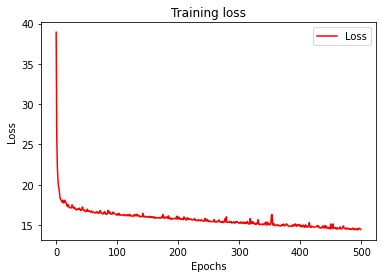

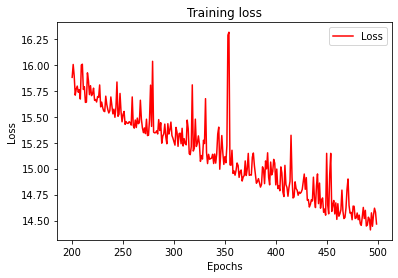

<Figure size 432x288 with 0 Axes>

In [44]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history1.history['loss']
epochs=range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
plt.figure()


zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()


In [45]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [46]:
rnn_forecast = model_forecast(model1, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

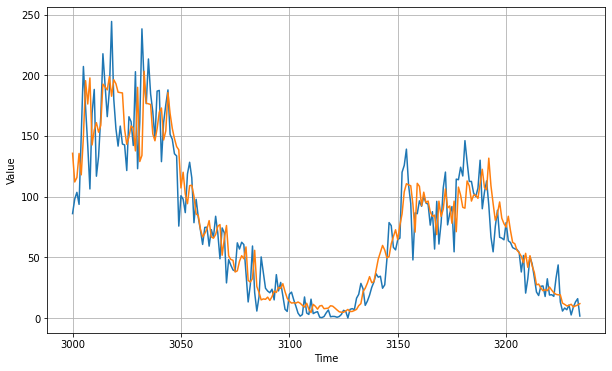

In [47]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [48]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

15.447584

model 2

<Figure size 432x288 with 0 Axes>

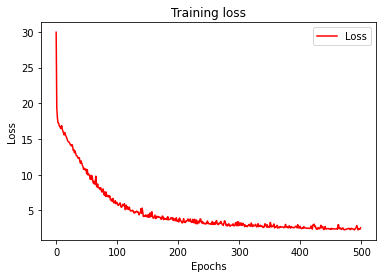

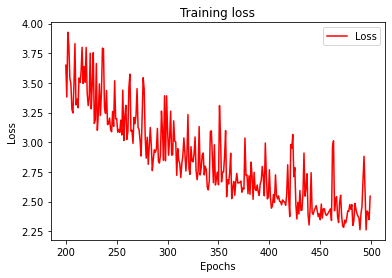

<Figure size 432x288 with 0 Axes>

In [49]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history2.history['loss']
epochs=range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
plt.figure()


zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [50]:
rnn_forecast = model_forecast(model2, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

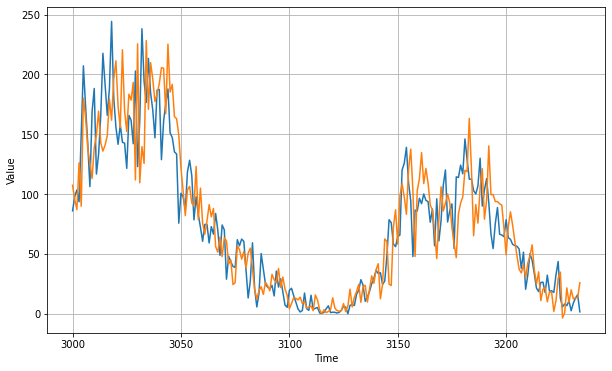

In [51]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [53]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

20.068195

## Time series forecasting ([tensorflow.org](https://www.tensorflow.org/tutorials/structured_data/time_series)) **(NOT DONE)**
Using a [weather time series dataset](https://www.bgc-jena.mpg.de/wetter/)
from 2009 to 2016

In [161]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [162]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [163]:
df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [164]:
# Just deal with hourly predictions, so start by sub-sampling the data from 10-minute intervals to one-hour intervals
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [165]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S') # remove date time from df and set it to date_time variable
date_time.head()

5    2009-01-01 01:00:00
11   2009-01-01 02:00:00
17   2009-01-01 03:00:00
23   2009-01-01 04:00:00
29   2009-01-01 05:00:00
Name: Date Time, dtype: datetime64[ns]

In [166]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


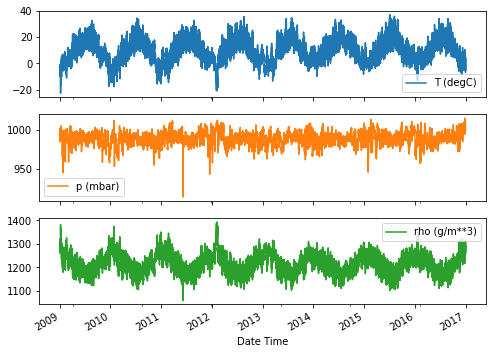

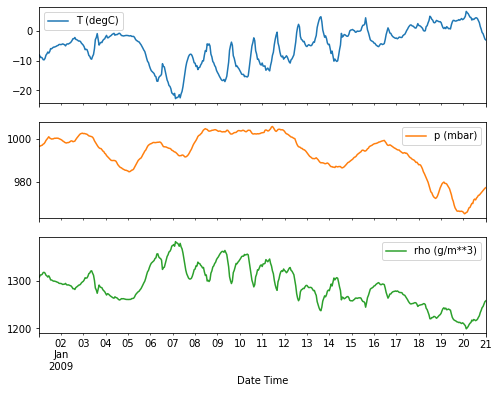

In [167]:
# Evolution of a few features over time
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

# Plot first 480 day
plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [168]:
plot_features.head(3)

,T (degC),p (mbar),rho (g/m**3)
Date Time,,,
2009-01-01 01:00:00,-8.05,996.50,1307.86
2009-01-01 02:00:00,-8.88,996.62,1312.25
2009-01-01 03:00:00,-8.81,996.84,1312.18


Inspect the data

In [169]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


One thing that should stand out is **the min value of the wind velocity** **(wv (m/s))** and the **maximum value (max. wv (m/s))** columns. **This -9999** is likely erroneous.

There's a separate wind direction column, so the velocity should be greater than zero (>=0). Replace it with zeros:


In [170]:
# check indexes with false values
idx = df.index[df['wv (m/s)'] == -9999.0].tolist()
df.loc[idx]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
343583,990.20,17.98,291.96,12.74,71.40,20.65,14.74,5.90,9.31,14.89,1178.14,-9999.0,-9999.0,359.8
343589,990.16,18.71,292.70,12.48,67.07,21.61,14.50,7.12,9.16,14.64,1175.26,-9999.0,-9999.0,359.8
343595,990.15,18.75,292.74,12.27,65.97,21.67,14.29,7.37,9.03,14.44,1175.18,-9999.0,-9999.0,359.8


In [171]:
# Replase with zeros
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame.
df['wv (m/s)'].min()


0.0

In [172]:
# check indexes with false values
idx = df.index[df['wv (m/s)'] == -9999.0].tolist()
df.loc[idx]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)


### Feature engineering

Before diving in to build a model, it's important to understand your data and be sure that you're passing the model appropriately formatted data.

**Wind**

The last column of the data, wd (deg)—gives the wind direction in units of degrees. Angles do not make good model inputs: 360° and 0° should be close to each other and wrap around smoothly. Direction shouldn't matter if the wind is not blowing.

Right now the distribution of wind data looks like this:

Text(0, 0.5, 'Wind Velocity [m/s]')

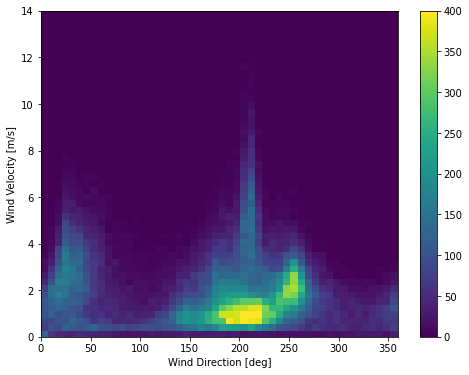

In [173]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

But this will be easier for the model to interpret if you convert the wind direction and velocity columns to a wind **vector**:

In [174]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

The distribution of wind vectors is much simpler for the model to correctly interpret:

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

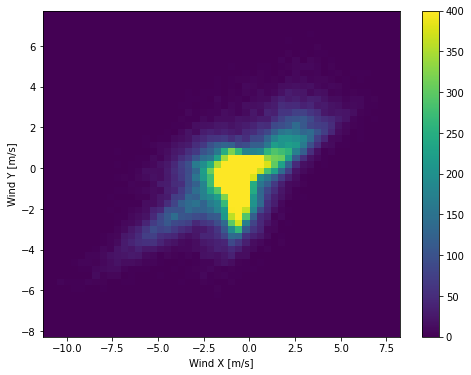

In [175]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [176]:
df.head(3)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,-0.245971,-0.044701,-0.619848,-0.112645
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,-0.175527,0.039879,-0.614344,0.139576


**Time**

Similarly, the *Date Time* column is very useful, but not in this string form. Start by converting it to seconds:



In [177]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

Similar to the wind direction, the time in seconds is not a useful model input. Being weather data, it has clear daily and yearly periodicity. There are many ways you could deal with periodicity.

You can get usable signals by using sine and cosine transforms to clear "Time of day" and "Time of year" signals:



In [178]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

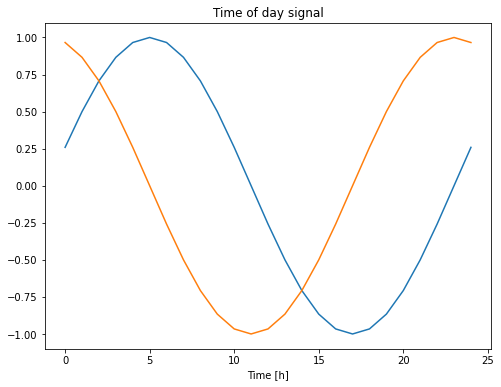

In [179]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')


This gives the model access to the most important frequency features. In this case you knew ahead of time which frequencies were important.

If you don't have that information, you can determine which frequencies are important by extracting features with [Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform). To check the assumptions, here is the [tf.signal.rfft](https://www.tensorflow.org/api_docs/python/tf/signal/rfft) of the temperature over time. Note the obvious peaks at frequencies near *1/year* and 1/day:



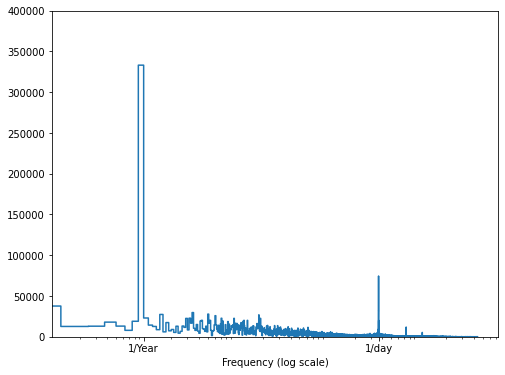

In [180]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

1 year and 1 day - the most important frequencies






###Split the data
Data is **not** being randomly shuffled before splitting. This is for two reasons:

It ensures that chopping the data into windows of consecutive samples is still possible.
It ensures that the validation/test results are more realistic, being evaluated on the data collected after the model was trained.


In [181]:
column_indices = {name: i for i, name in enumerate(df.columns)}

# 70%, 20%, 10% split for the training, validation, and test sets.
n = len(df)
train_df = df[0:int(n * 0.7)]
val_df = df[int(n * 0.7):int(n * 0.9)]
test_df = df[int(n * 0.9):]

num_features = df.shape[1]
num_features, len(train_df), len(val_df), len(test_df)

(19, 49063, 14018, 7010)

In [182]:
train_df.head(3)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503,0.258819,0.965926,0.010049,0.999950
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,-0.245971,-0.044701,-0.619848,-0.112645,0.500000,0.866025,0.010766,0.999942
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,-0.175527,0.039879,-0.614344,0.139576,0.707107,0.707107,0.011483,0.999934


### Normalize the data
It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages. That's not the focus of this tutorial, and the validation and test sets ensure that you get (somewhat) honest metrics. So, in the interest of simplicity this tutorial uses a simple average.

In [183]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std


In [184]:
train_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
5,0.945308,-1.982473,-2.041888,-1.918973,1.117102,-1.302851,-1.477323,-0.790424,-1.480036,-1.482697,2.218524,0.193409,0.221161,0.111140,0.217928,0.366111,1.366069,-0.061052,1.428434
11,0.959770,-2.078372,-2.138166,-2.060964,1.044617,-1.330143,-1.534354,-0.786272,-1.536190,-1.539035,2.325708,0.172987,0.222101,0.109458,0.227798,0.707200,1.224794,-0.060029,1.428424
17,0.986284,-2.070284,-2.132435,-2.045187,1.062738,-1.328843,-1.527225,-0.788348,-1.528703,-1.531992,2.323998,0.207983,0.276266,0.111218,0.324078,1.000100,1.000059,-0.059006,1.428412
23,1.004362,-2.098014,-2.161090,-2.096820,1.008375,-1.336641,-1.546235,-0.782121,-1.547420,-1.553119,2.358913,0.270343,0.195267,0.246907,0.145176,1.224850,0.707179,-0.057983,1.428400
29,1.061006,-2.165028,-2.232152,-2.187178,0.984214,-1.353535,-1.579503,-0.782121,-1.581113,-1.585982,2.446320,0.112264,0.350818,0.048640,0.402053,1.366133,0.366112,-0.056960,1.428388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294353,0.169167,0.904892,0.886564,1.571997,0.947972,0.776492,1.984916,-0.493604,1.979016,1.977352,-0.882480,-0.166720,-1.508412,-0.155728,-1.363530,-0.955374,1.042725,-0.855026,-1.154613
294359,0.266787,0.879473,0.853325,1.405624,0.621793,0.742703,1.680752,-0.283962,1.672043,1.672192,-0.822662,-0.824901,-0.641039,-0.704391,-0.475387,-0.652949,1.254471,-0.855883,-1.154062
294365,0.217374,0.740824,0.719224,1.425703,1.086900,0.559461,1.716396,-0.605690,1.709479,1.707403,-0.716211,-0.030746,0.645277,0.013960,0.600050,-0.306022,1.380734,-0.856739,-1.153511
294371,0.213759,0.710783,0.689423,1.412795,1.147303,0.521772,1.692633,-0.645127,1.687018,1.683929,-0.689842,0.014300,-0.102616,-0.095117,-0.198426,0.061765,1.412909,-0.857595,-1.152959


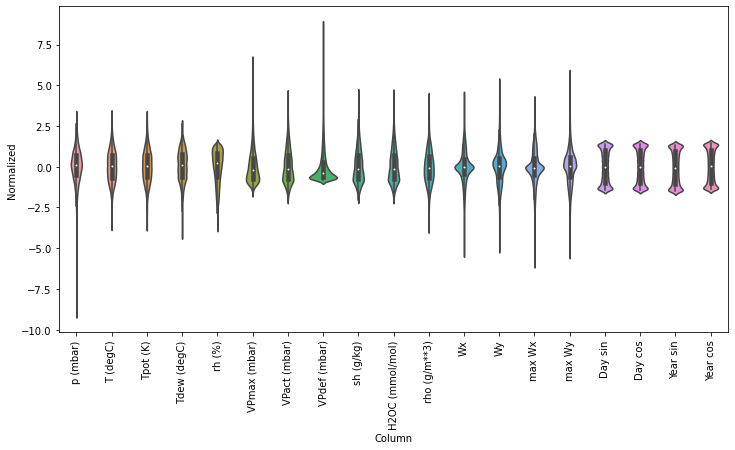

In [185]:
# Now, peek at the distribution of the features. Some features do have long tails, but there are no obvious errors like the -9999 wind velocity value.

df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

### Data windowing

The main features of the input windows are:

* The width (number of time steps) of the input and label windows.
* The time offset between them.
* Which features are used as inputs, labels, or both.

This section focuses on implementing the data windowing so that it can be reused for all of those models.




**1. Indexes and offsets**

In [186]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


In [187]:
# Here is code to create the 2 windows shown in the diagrams at the start of this section:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

In [188]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

**2. Split**

In [189]:
# Given a list of consecutive inputs, the split_window method will convert them to a window of inputs and a window of labels.

def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [190]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')


All shapes are: (batch, time, features)
Window shape: (3, 7, 19)
Inputs shape: (3, 6, 19)
Labels shape: (3, 1, 1)


**3. Plot**

In [191]:
w2.example = example_inputs, example_labels

In [192]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

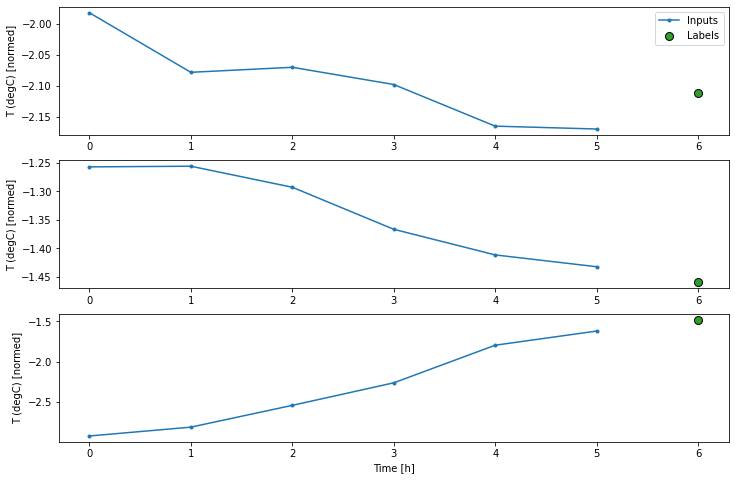

In [193]:
w2.plot()

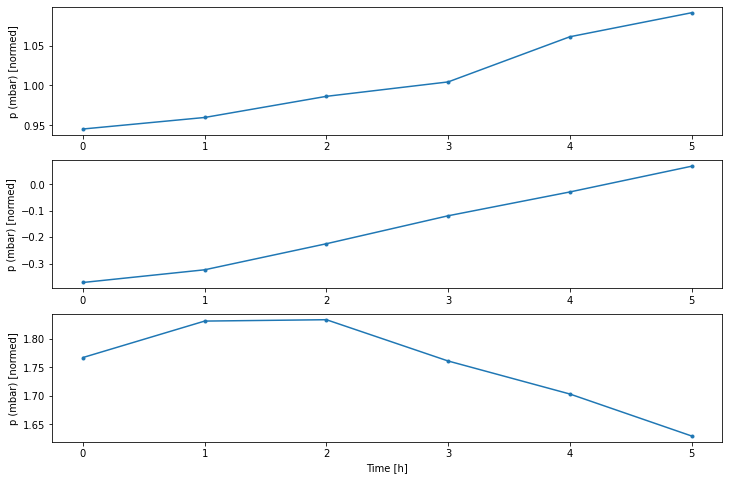

In [195]:
# I can plot the other columns, but the example window w2 configuration only has labels for the T (degC) column
w2.plot(plot_col='p (mbar)')

**4. Create tf.data.Datasets**

In [196]:
# Finally, this make_dataset method will take a time series DataFrame and convert it to a tf.data.Dataset of (input_window, label_window) pairs using the tf.keras.utils.timeseries_dataset_from_array function:

def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [198]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [199]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [200]:
# Iterating over a Dataset yields concrete batches:

for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


## Time series forecasting 2

[**London bike sharing dataset**
](https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset)

Historical data for bike sharing in London 'Powered by TfL Open Data'


In [214]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

# register_matplotlib_converters()
# sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10


In [201]:
!gdown --id 1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3 --output london_bike_sharing.csv

Downloading...
From: https://drive.google.com/uc?id=1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3
To: /content/london_bike_sharing.csv
100% 1.03M/1.03M [00:00<00:00, 23.7MB/s]


In [202]:
df = pd.read_csv(
  "london_bike_sharing.csv", 
  parse_dates=['timestamp'], 
  index_col="timestamp"
)

In [203]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [210]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [211]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1


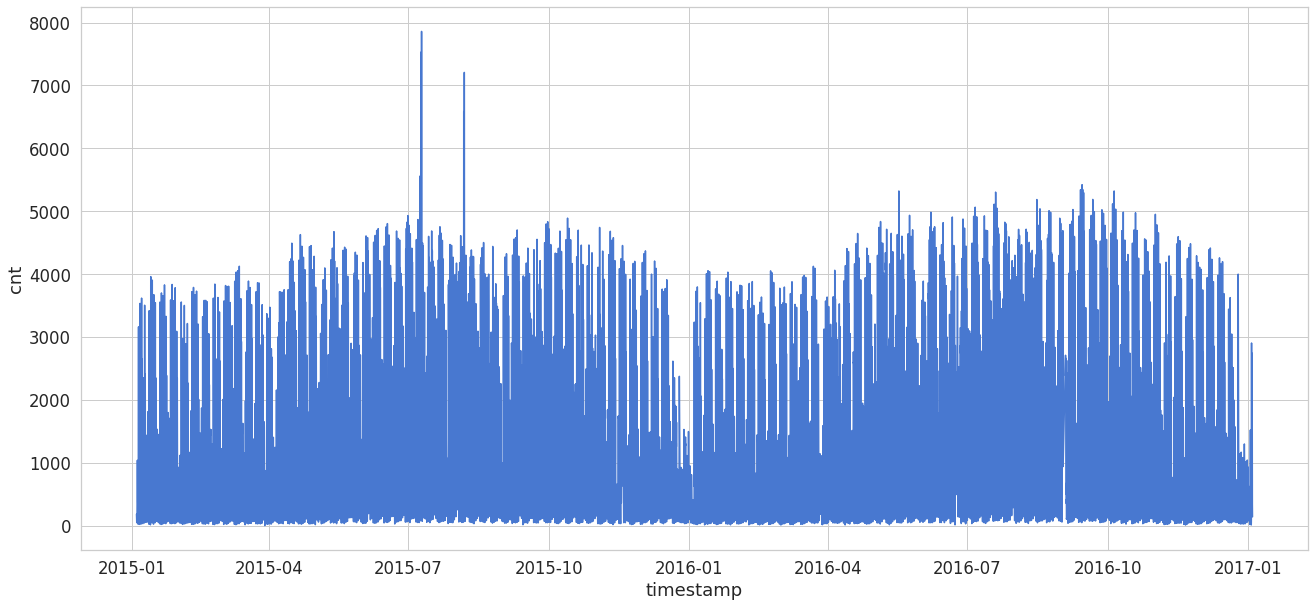

In [215]:
# Count of bikes sharing by day
sns.lineplot(x=df.index, y="cnt", data=df);

In [217]:
sns.lineplot(x=df.index, y="cnt", data=df.iloc[200:]);

ValueError: ignored

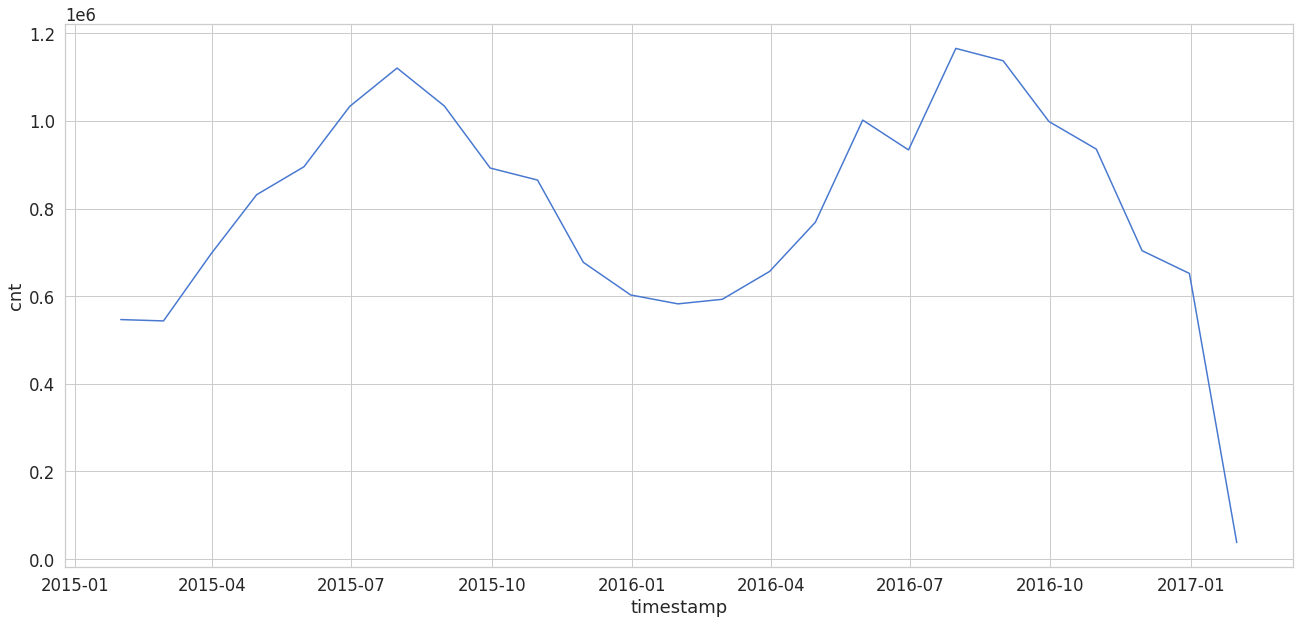

In [218]:
# Count of bikes sharing by month
df_by_month = df.resample('M').sum()

sns.lineplot(x=df_by_month.index, y="cnt", data=df_by_month);

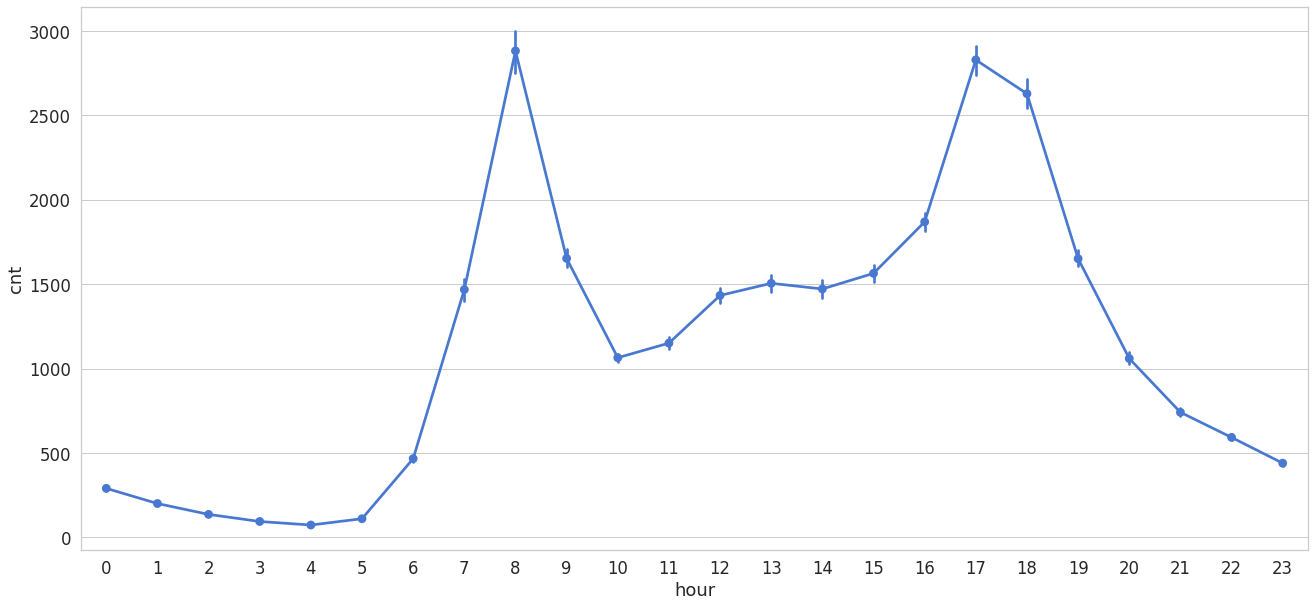

In [223]:
# count by hour
sns.pointplot(data=df, x='hour', y='cnt')

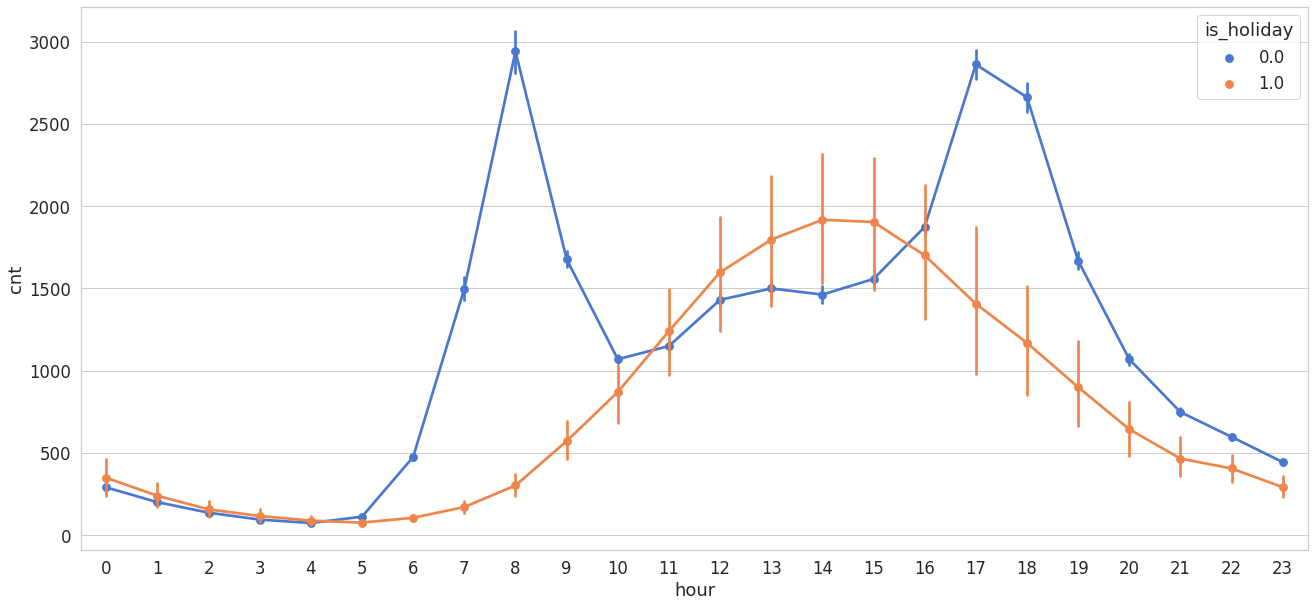

In [224]:
# count if holiday
sns.pointplot(data=df, x='hour', y='cnt', hue='is_holiday')

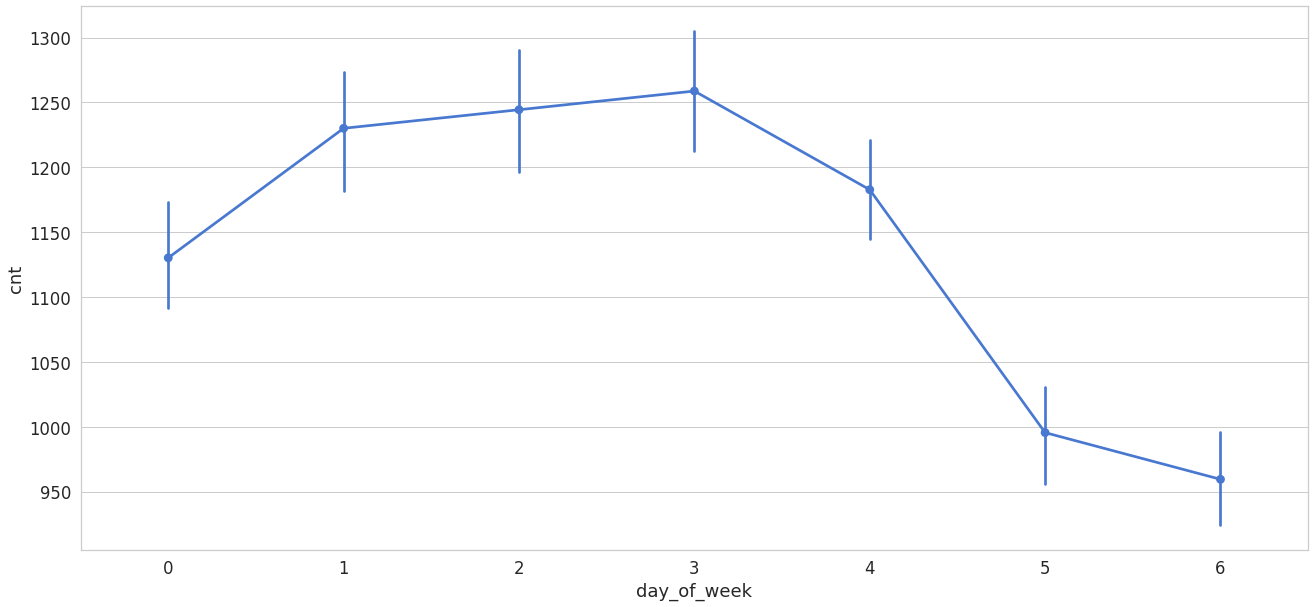

In [227]:
# Count by day of week
sns.pointplot(data=df, x='day_of_week', y='cnt')

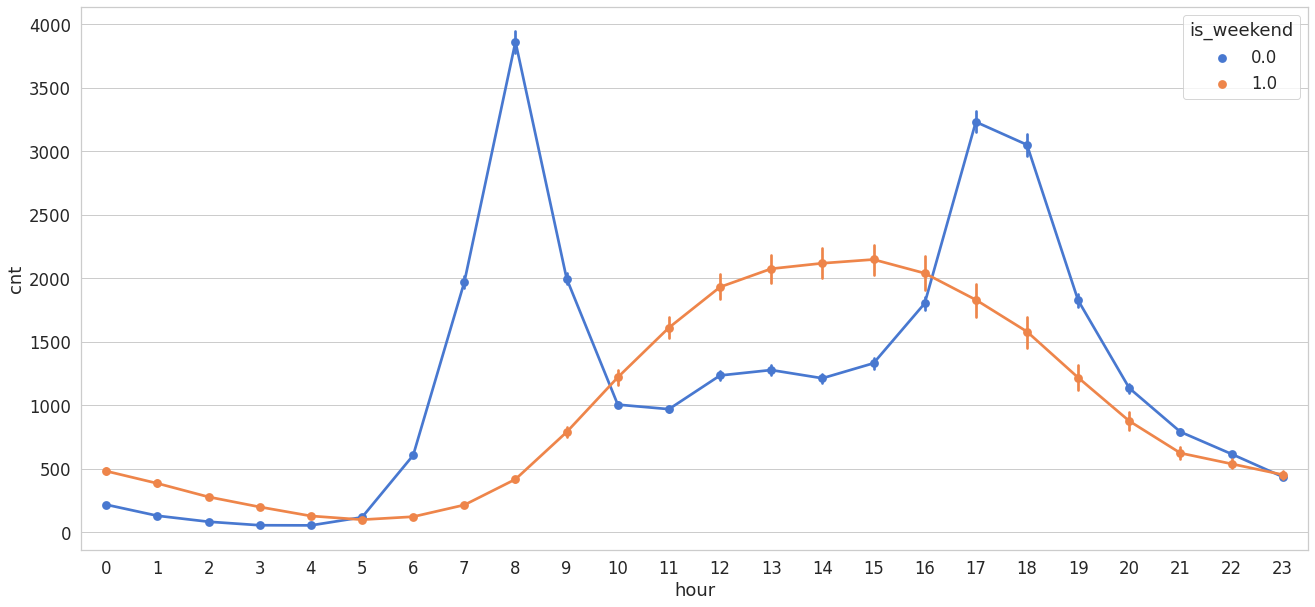

In [225]:
# count if weekend
sns.pointplot(data=df, x='hour', y='cnt', hue='is_weekend')

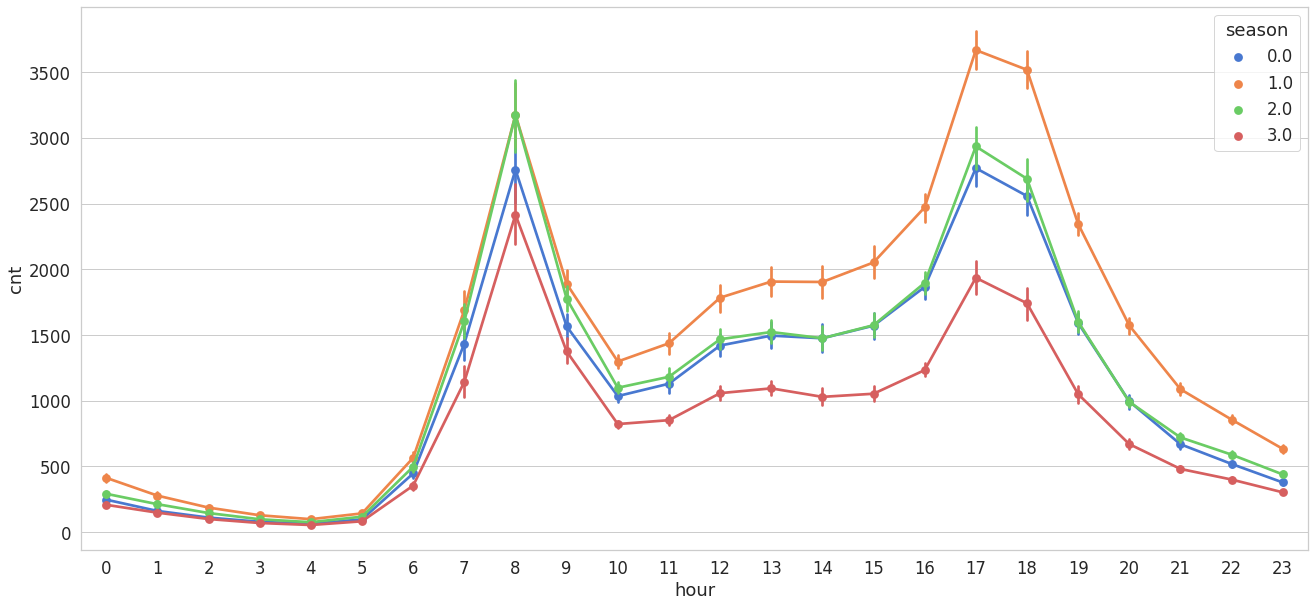

In [228]:
# By season (winter, spring, summer, autumn)
sns.pointplot(data=df, x='hour', y='cnt', hue='season');

In [231]:
train_size = int(len(df) * 0.9) # 90% for train
test_size = len(df) - train_size # 10% for test
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
len(train), len(test), train.shape, test.shape

(15672, 1742, (15672, 13), (1742, 13))

## Troubleshooting tidbits


* **Input and output shapes** — print these out if you're stuck.
* **Input and output datatypes** — TensorFlow usually prefers float32.
* **Output activation functions** — for classification: `sigmoid` vs `softmax`, which one should you use?
* **Loss functions** — for classification `sparse_categorical_crossentropy` vs `categorical_crossentropy`, which one should you use?

If your Yi's are one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

But if your Yi's are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]


* **Ways to improve a model** — if your model isn't performing as well as it should, what can you do?

Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization funcion
* Change the learning rate
* Fitting on more data
* Fitting for longer

In [ ]:
# Save a model using the SavedModel format
model_name.save('name_for_file')

# Save a model using the HDF5 format
model_name.save("name_for_h5_file.h5") # note the addition of '.h5' on the end

# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("name_for_file")

# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("name_for_h5_file.h5")

loaded_saved_model.summary()
loaded_h5_model.summary()

In [ ]:
# Download saved model (or any file) from Google Colab
from google.colab import files
files.download("name_for_h5_file.h5")


## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

> 📖 Resources for more on preprocessing data:
* [Scikit-Learn's documentation on preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).

## Typical architecture of a regression neural network 

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.*  ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

## Typical architecture of a classification neural network 

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

## Improving a model

To improve our model, we can alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose a different optimization function (such as the [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

How about we try adding more neurons, an extra layer and our friend the Adam optimizer?

Surely doing this will result in predictions better than guessing...

> **Note:** If you're using TensorFlow 2.7.0+ the original code from the following cells may have caused some errors. They've since been updated to fix those errors. You can see explanations on what happened at the following resources:
* [Example Colab Notebook](https://colab.research.google.com/drive/1_dlrB_DJOBS9c9foYJs49I0YwN7LTakl?usp=sharing)
* [TensorFlow for Deep Learning GitHub Discussion on TensorFlow 2.7.0 breaking changes](https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278)

  * If our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).


1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Don't forget use best epoch